**Diabets prediction analysis**

Modelli di Machine Learning per la predizione di diabete a partire da fattori fisiologici e anamnesi.

Datasource : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data?select=diabetes_prediction_dataset.csv

**EDA**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [ ]:
#serve per montare google drive e per poi prendere il dataset salvato che mi interessa
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# link of data https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

#reading data from my google drive
data = pd.read_csv('/content/drive/MyDrive/DatasetProjects/diabetes_prediction_dataset.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#check missing values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
#aggiungo una colonna categorica al df così sul grafico l'etichetta è una stringa e non binaria
data.loc[(data.diabetes==0),'patologia']='non_diabetico'
data.loc[(data.diabetes==1),'patologia']='diabetico'

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,patologia
0,Female,80.0,0,1,never,25.19,6.6,140,0,non_diabetico
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,non_diabetico
2,Male,28.0,0,0,never,27.32,5.7,158,0,non_diabetico
3,Female,36.0,0,0,current,23.45,5.0,155,0,non_diabetico
4,Male,76.0,1,1,current,20.14,4.8,155,0,non_diabetico


vediamo conteggio dei diabetici e non per valutare se il dataset è bilanciato

Text(0.5, 1.0, 'Conteggio persone con patologia ')

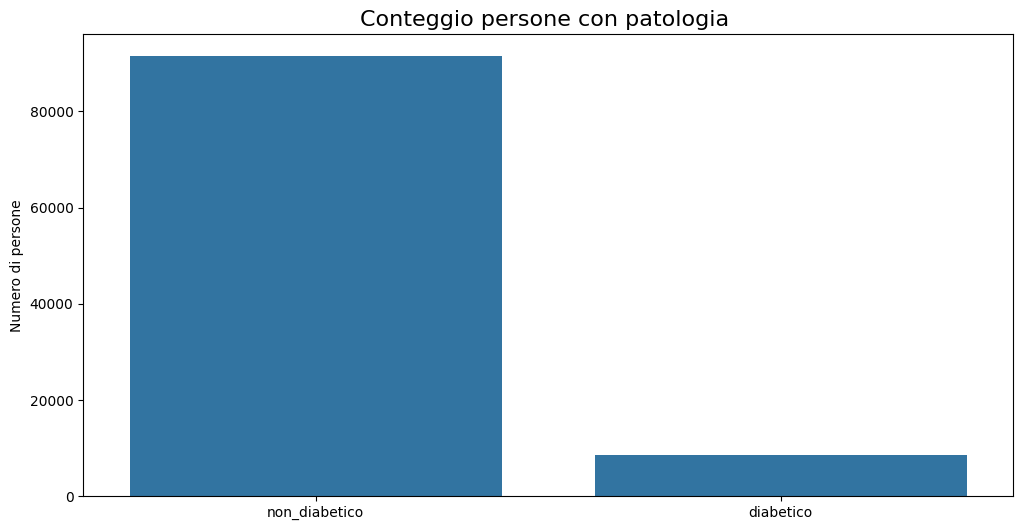

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='patologia', data=data)
plt.xlabel('')
plt.ylabel('Numero di persone')
plt.title('Conteggio persone con patologia ', size=16)

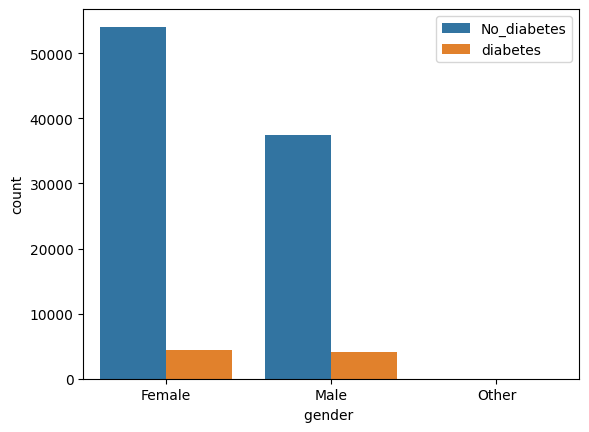

In [ ]:
sns.countplot(x='gender',hue='diabetes',data=data)
plt.xlabel('gender ')
plt.legend(["No_diabetes", "diabetes"])

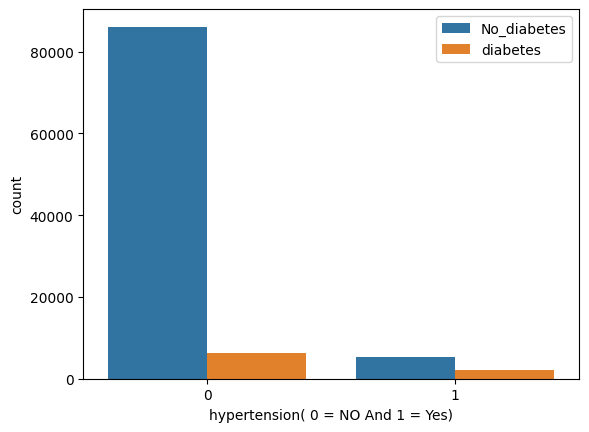

In [ ]:
sns.countplot(x='hypertension',hue='diabetes',data=data)
plt.xlabel('hypertension( 0 = NO And 1 = Yes)')
plt.legend(["No_diabetes", "diabetes"])

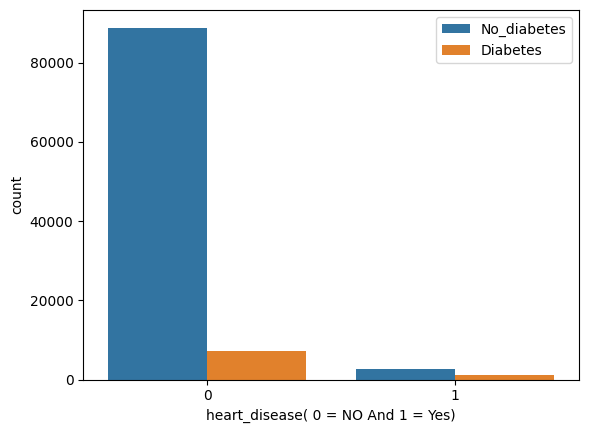

In [ ]:
sns.countplot(x='heart_disease',hue='diabetes',data=data)
plt.xlabel('heart_disease( 0 = NO And 1 = Yes)')
plt.legend(["No_diabetes", "Diabetes"])

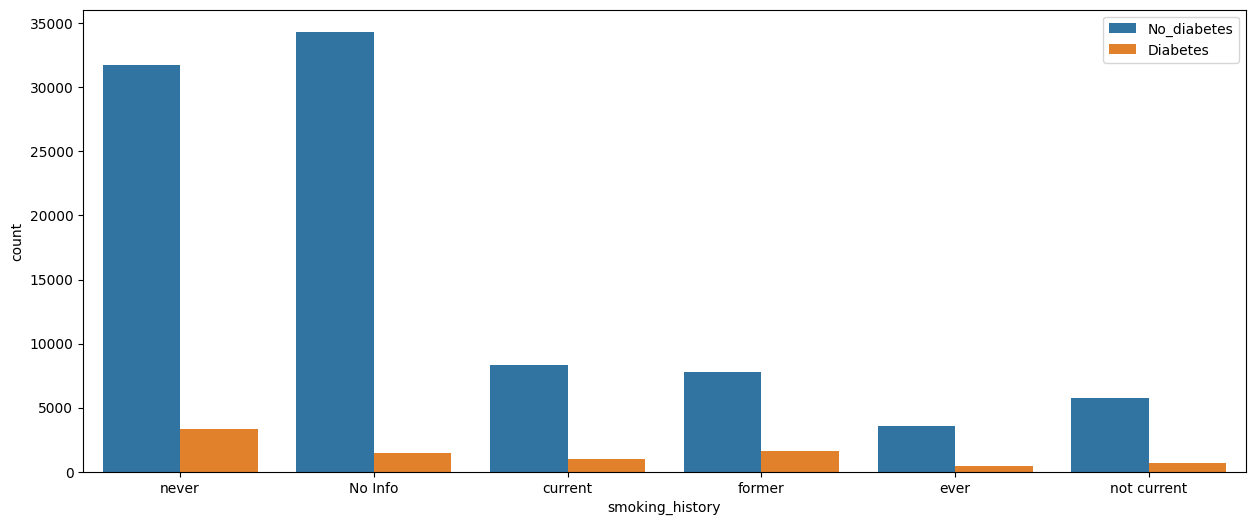

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='smoking_history',hue='diabetes',data=data)
plt.legend(["No_diabetes", "Diabetes"])

per ulteriori analisi esplorative trasformo le feautures categoriche in numeriche (sarebbe comunque servito farlo nel preprocessing prima di procedere con gli algoritmi di classificazione )

In [ ]:
#trasformo le features categoriche di smoking_history in features numeriche

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

le = label_encoder.fit(data['smoking_history'])

#aggiungo una colonna  color al dataset e gli assegno il transform della feature categorica
data['fumo'] = le.transform(data['smoking_history'])

#qui vedo le corrispondenze tra i valori categorici e quelli numerici
new_labels = dict(zip(range(len(le.classes_)),le.classes_))
print(new_labels)

{0: 'No Info', 1: 'current', 2: 'ever', 3: 'former', 4: 'never', 5: 'not current'}


In [ ]:
#faccio a stessa cosa per la feauture categorica gender
le = label_encoder.fit(data['gender'])

#aggiungo una colonna  color al dataset e gli assegno il transform della feature categorica
data['sex'] = le.transform(data['gender'])

#qui vedo le corrispondenze tra i valori categorici e quelli numerici
new_labels = dict(zip(range(len(le.classes_)),le.classes_))
print(new_labels)

{0: 'Female', 1: 'Male', 2: 'Other'}


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,patologia,fumo,sex
0,Female,80.0,0,1,never,25.19,6.6,140,0,non_diabetico,4,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,non_diabetico,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,non_diabetico,4,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,non_diabetico,1,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,non_diabetico,1,1


In [ ]:
numcol= data.select_dtypes(include=[np.number])  #qui riprendo  solo le  colonne con i valori numerici
numcol.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,fumo,sex
0,80.0,0,1,25.19,6.6,140,0,4,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,4,1
3,36.0,0,0,23.45,5.0,155,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,1


vedo alcuni grafici relativi alla distribuzione  e correlazione dellle features

Text(0.5, 1.0, 'Pairplot features ')

<Figure size 1200x600 with 0 Axes>

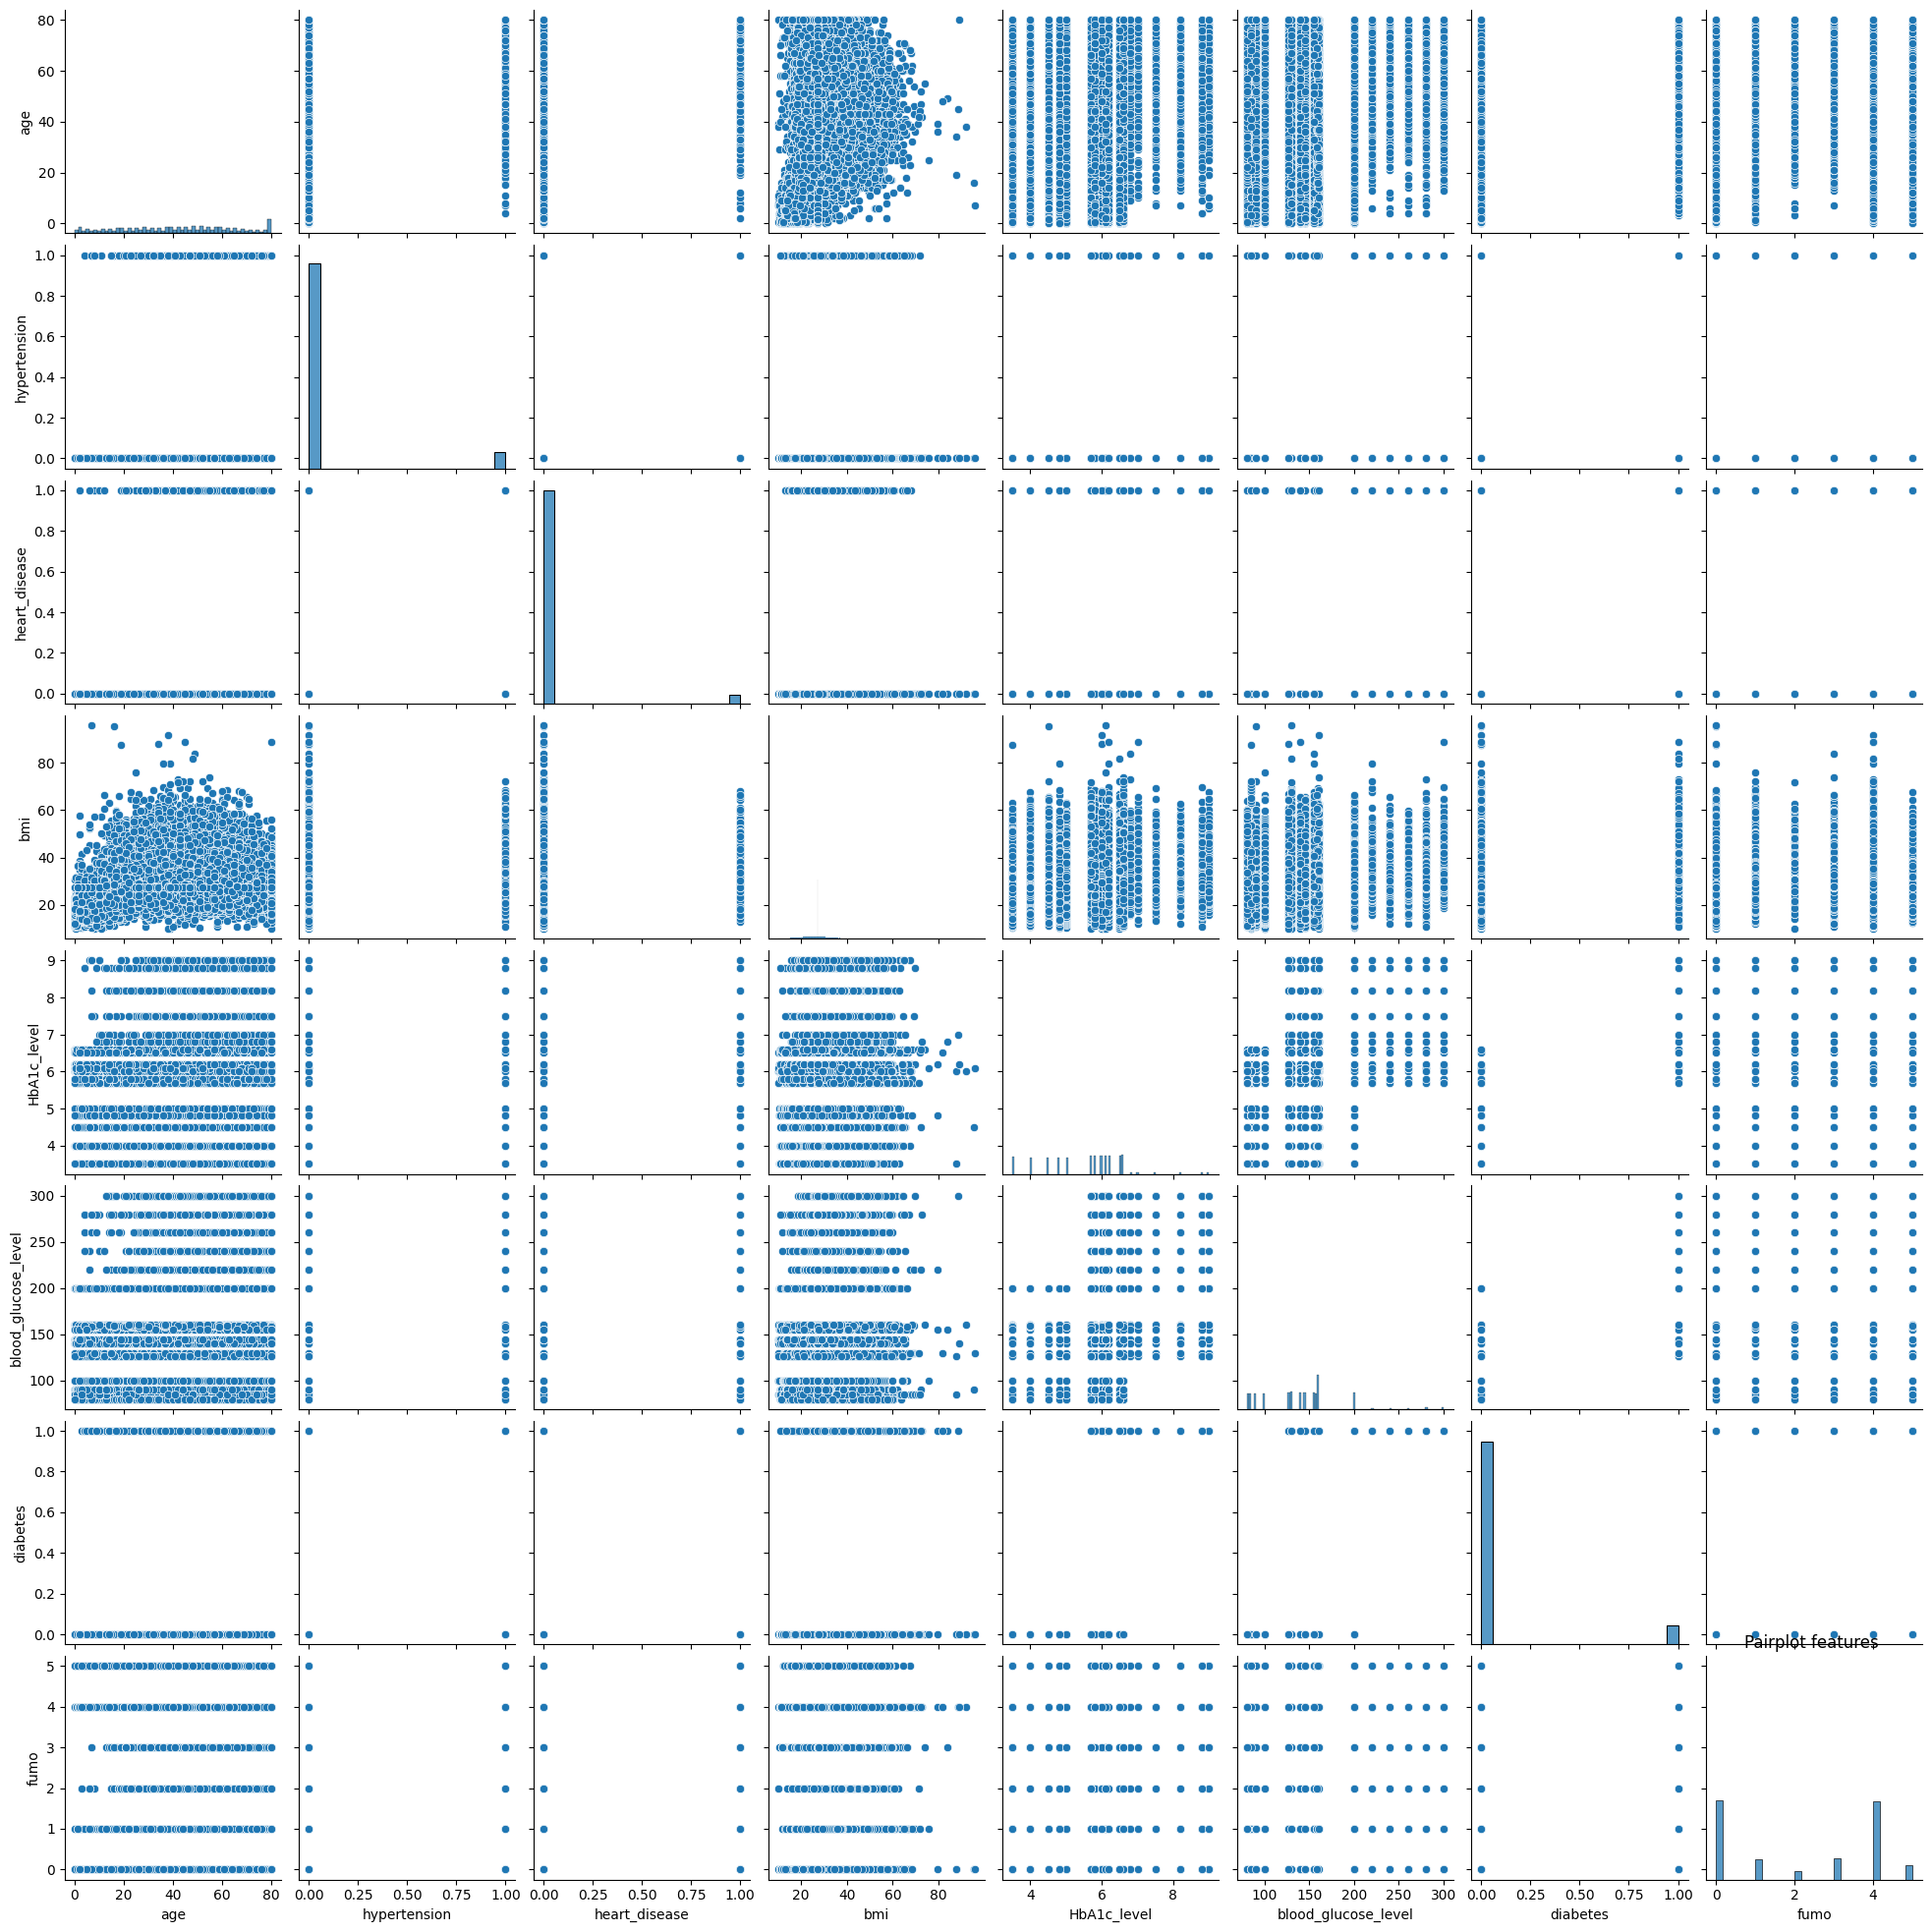

In [ ]:
#pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(data=numcol)
#plt.title('Pairplot features ')

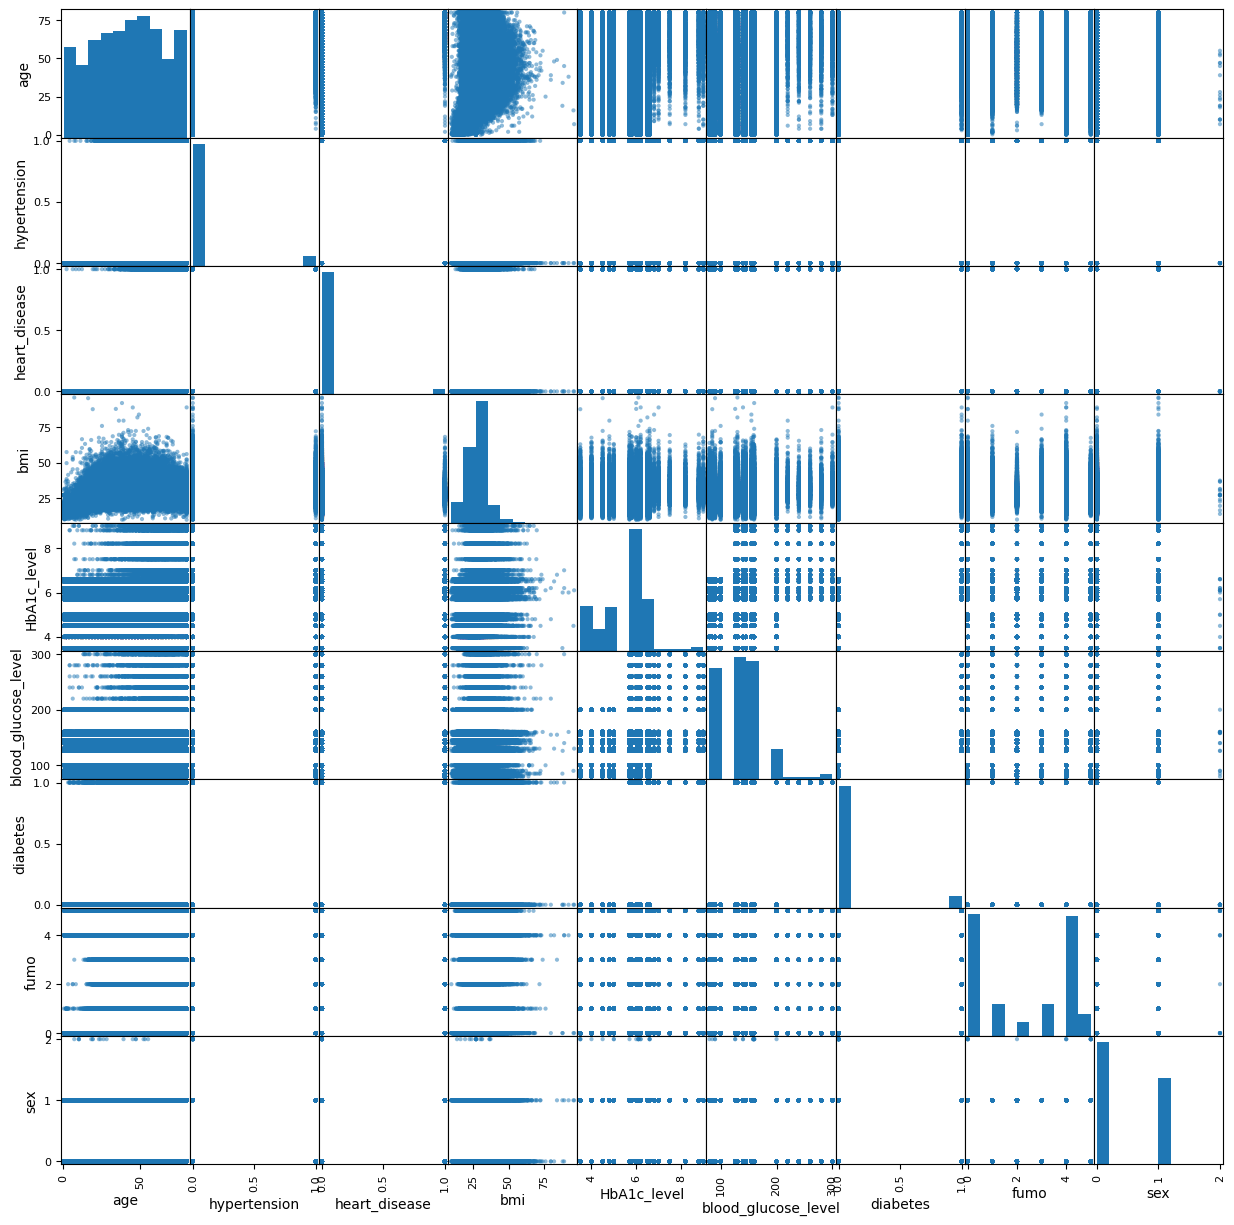

In [ ]:
#scatterplot
pd.plotting.scatter_matrix(numcol, figsize=(15,15))
plt.show()

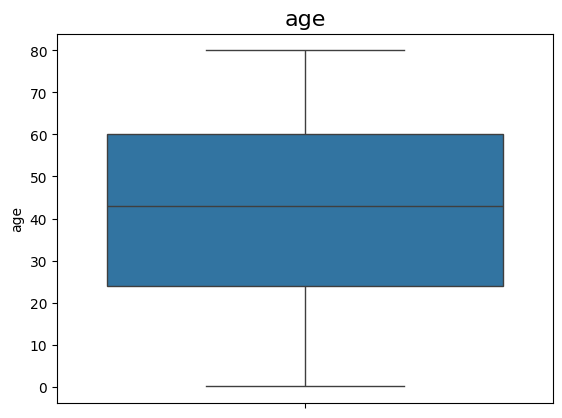

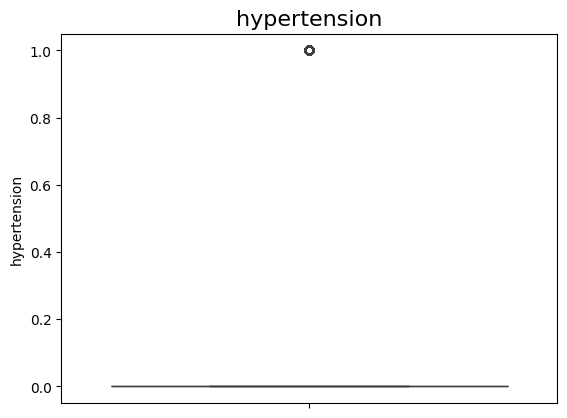

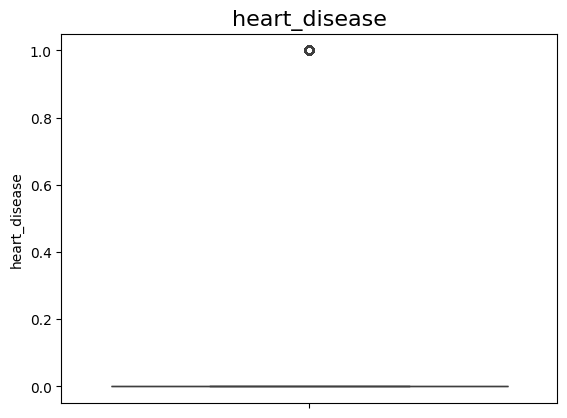

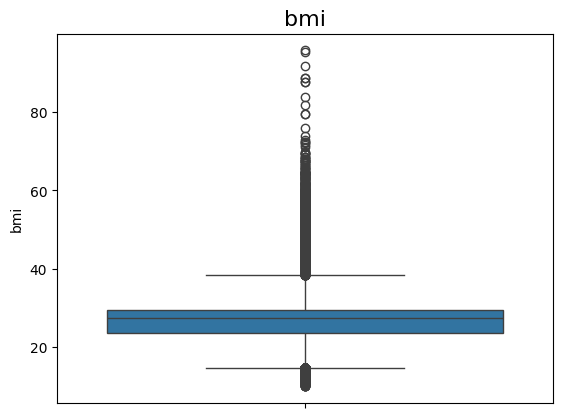

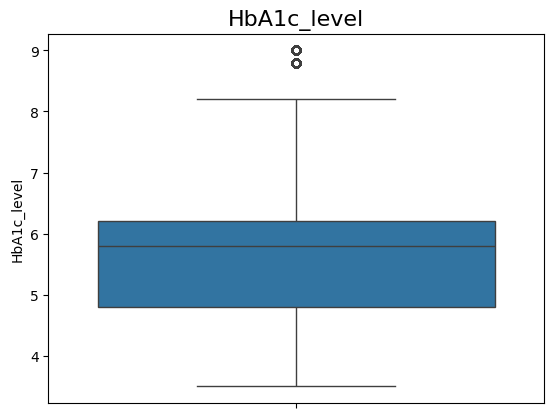

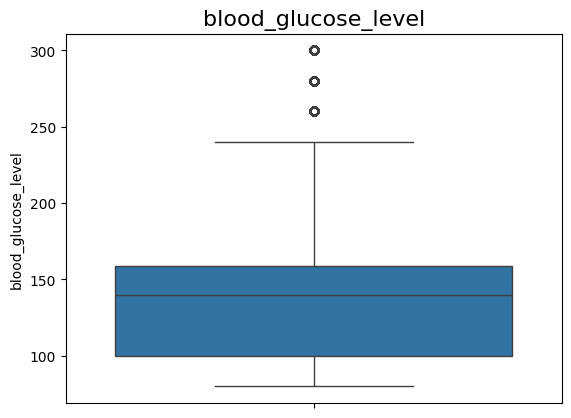

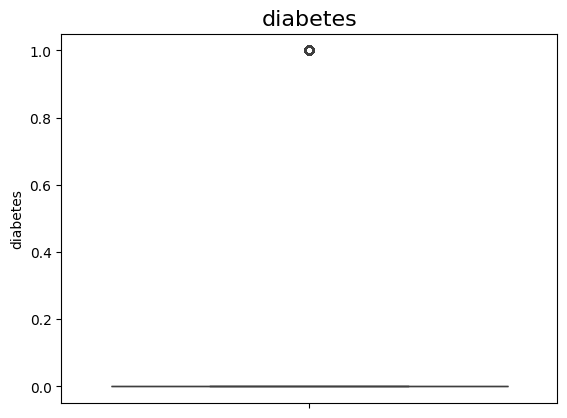

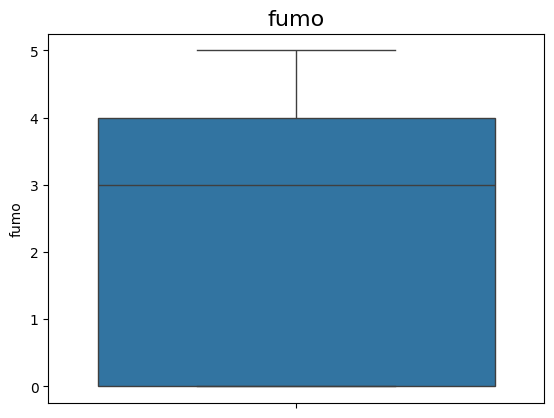

In [ ]:
#boxplot
for col in numcol.columns:
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(numcol[col])
       plt.title(col, size=16)
       plt.show()

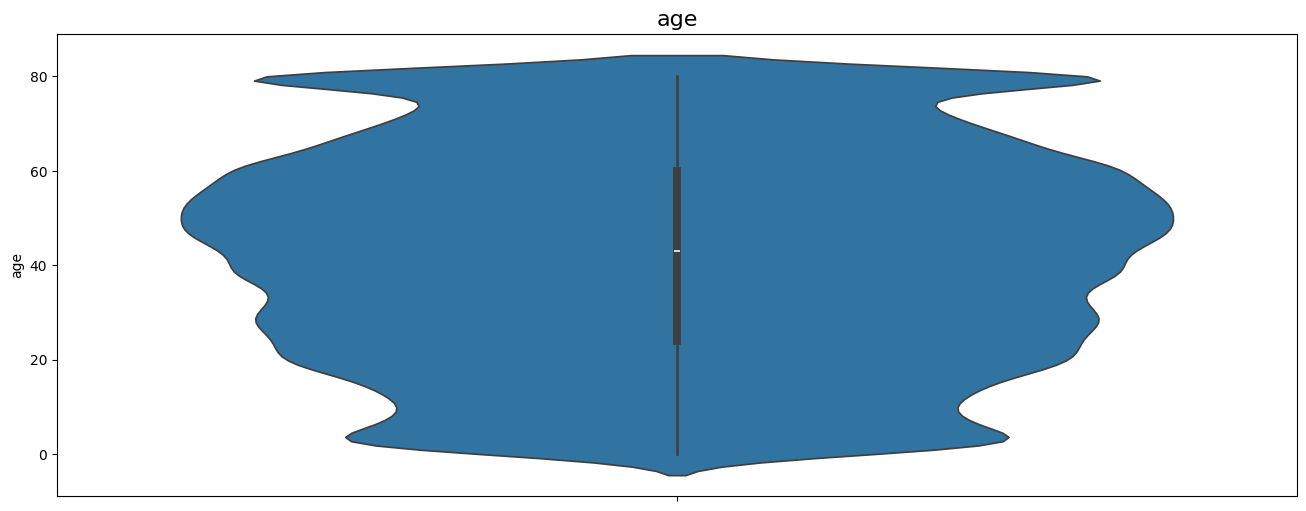

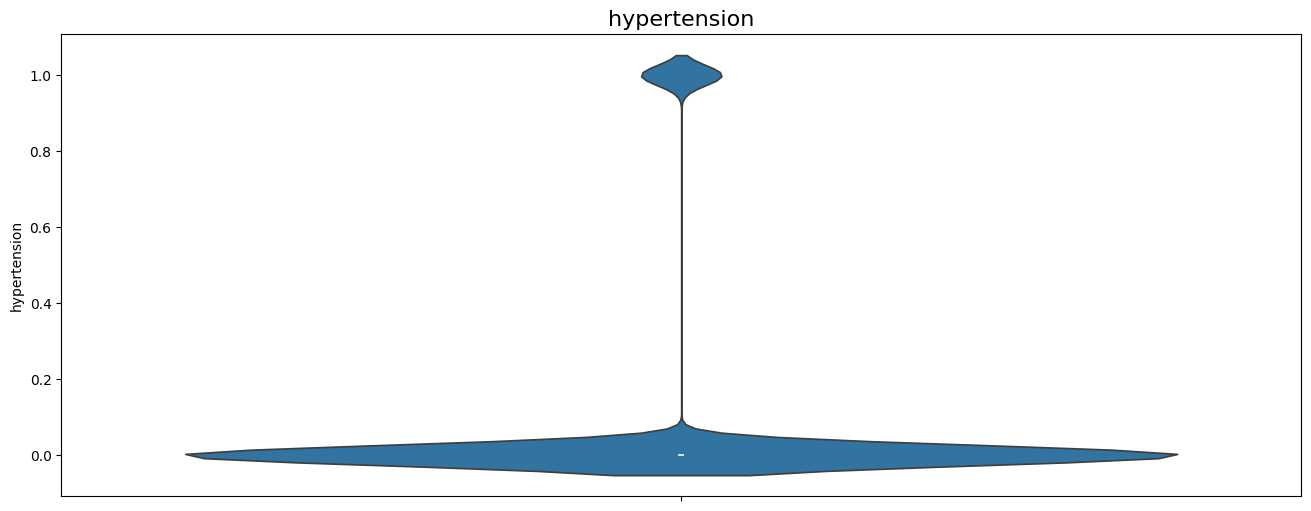

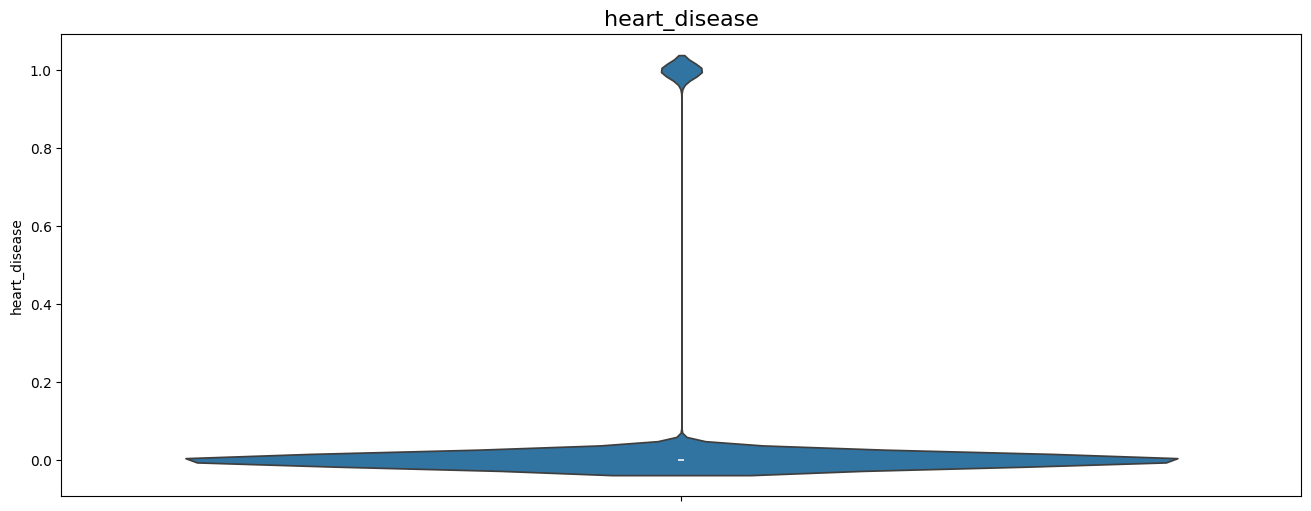

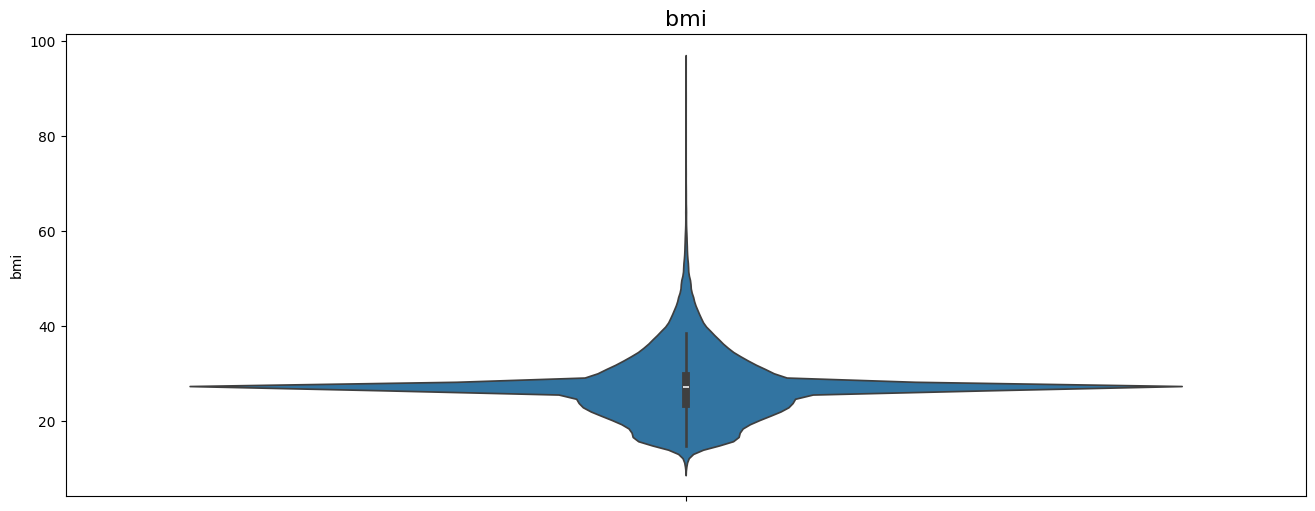

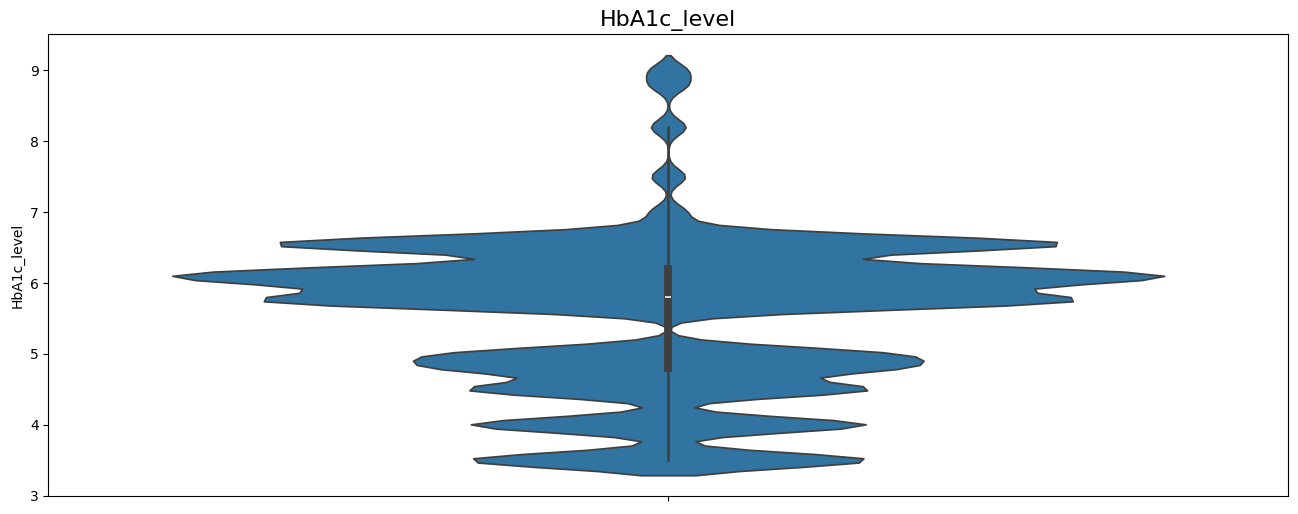

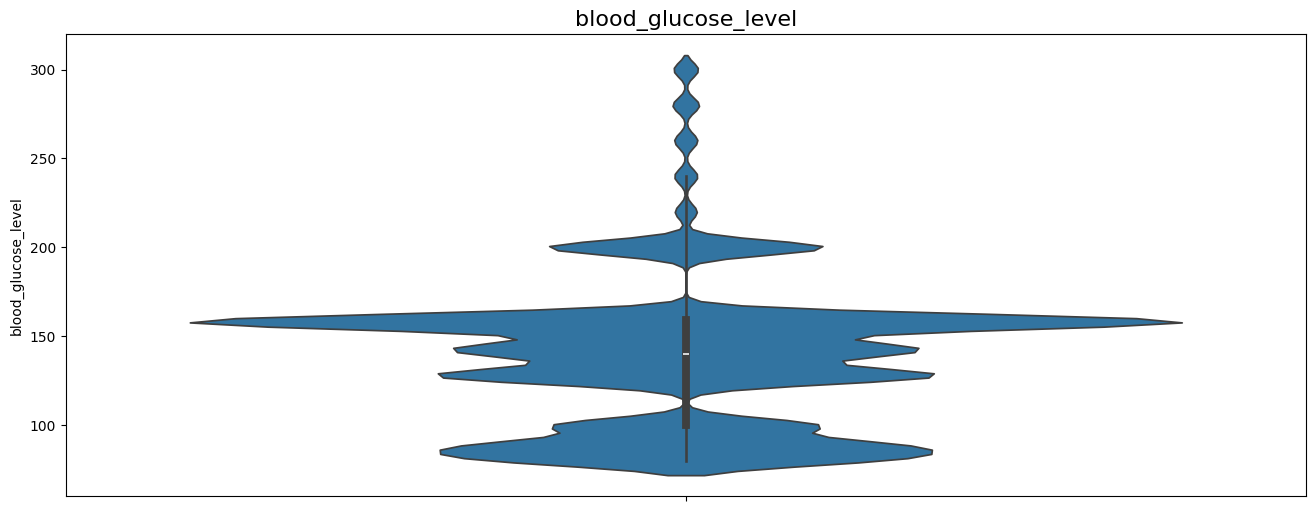

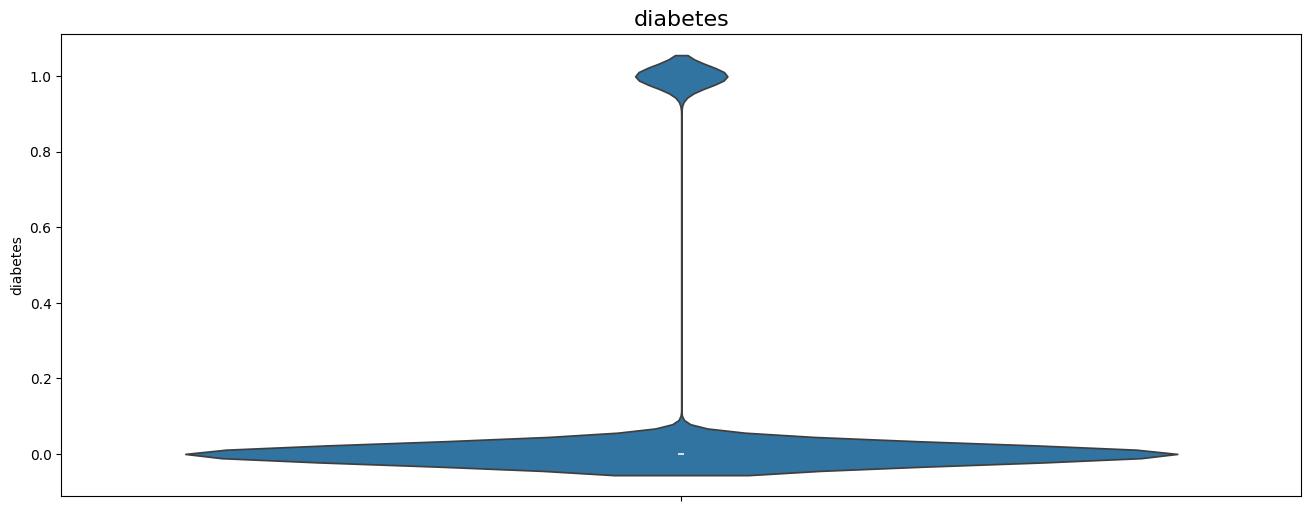

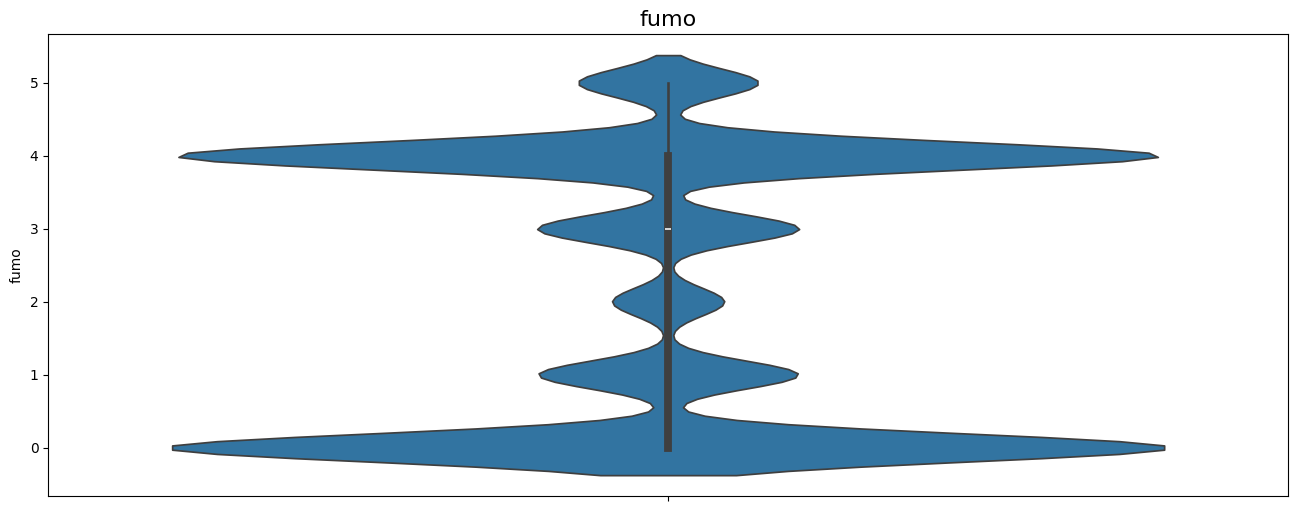

In [ ]:
#grafico a violino
for col in numcol.columns:
        plt.figure(figsize=(16, 6))
        sns.violinplot(numcol[col])
        plt.title(col, size=16)
        plt.show()

<Figure size 1600x600 with 0 Axes>

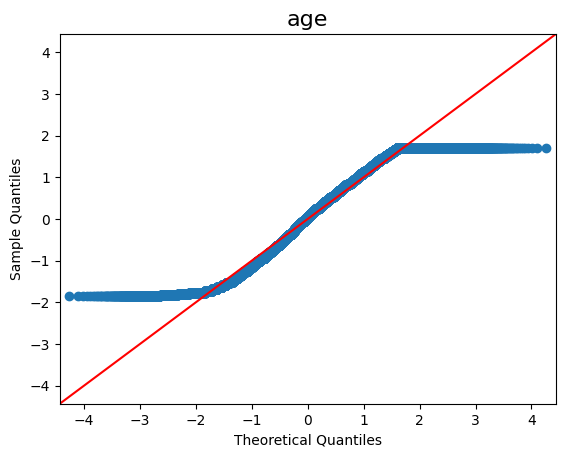

<Figure size 1600x600 with 0 Axes>

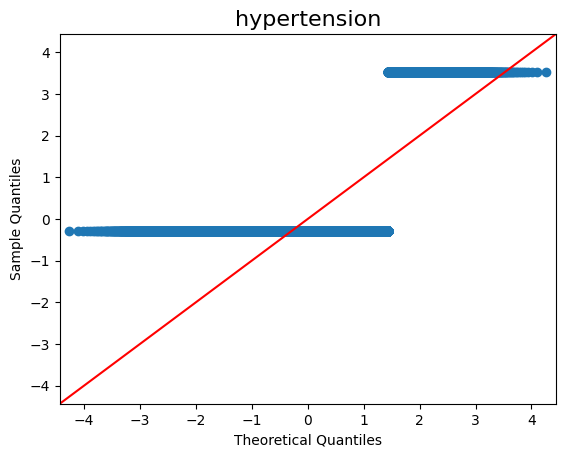

<Figure size 1600x600 with 0 Axes>

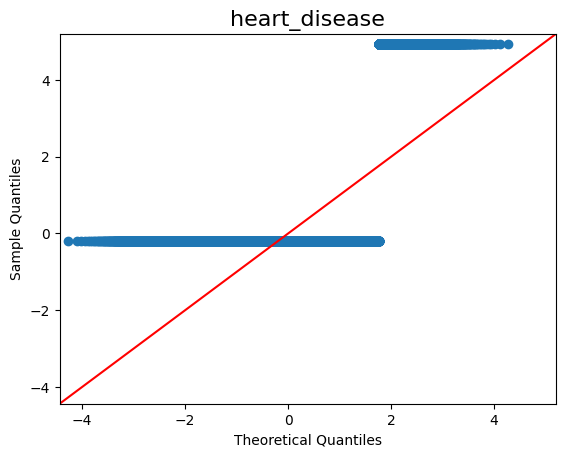

<Figure size 1600x600 with 0 Axes>

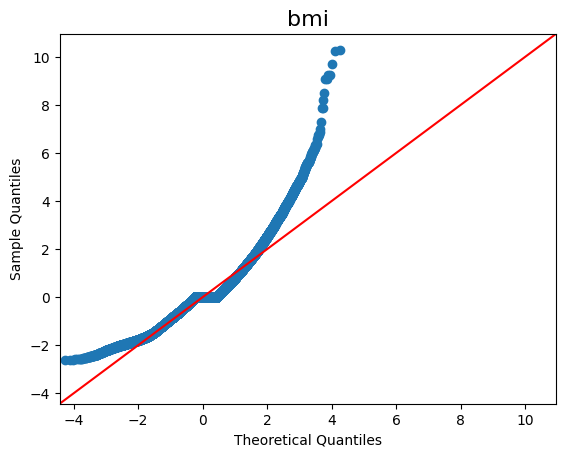

<Figure size 1600x600 with 0 Axes>

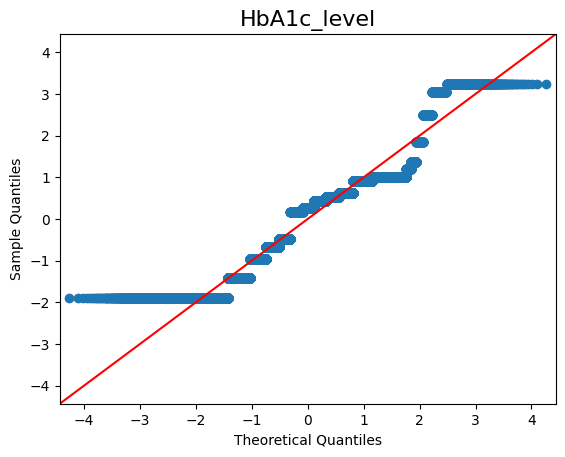

<Figure size 1600x600 with 0 Axes>

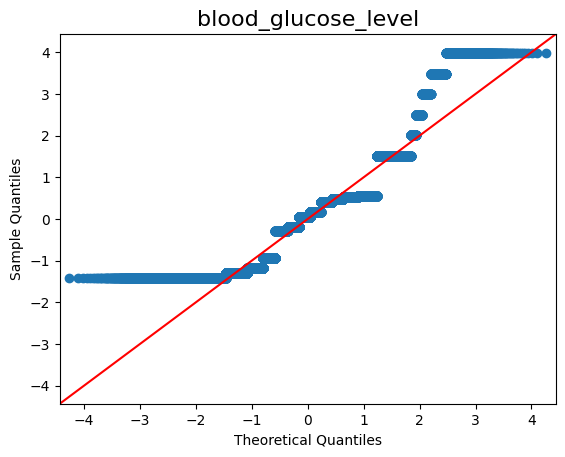

<Figure size 1600x600 with 0 Axes>

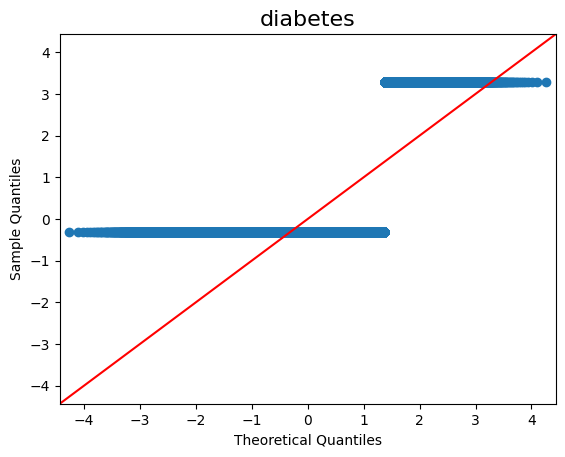

<Figure size 1600x600 with 0 Axes>

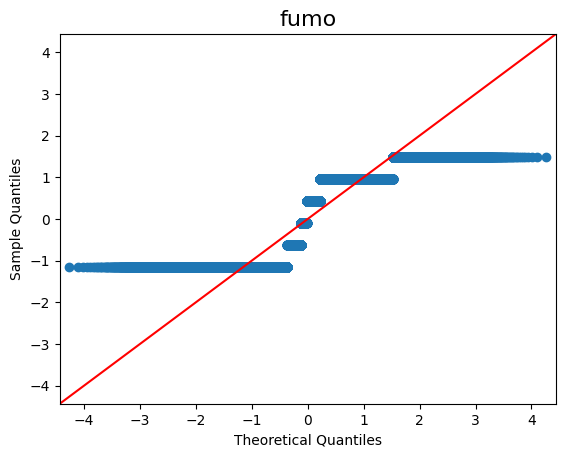

In [ ]:
#vediamo se assimilabile a gaussiana
import statsmodels.api as sm

for col in numcol.columns:
        plt.figure(figsize=(16, 6))
        sm.qqplot(numcol[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


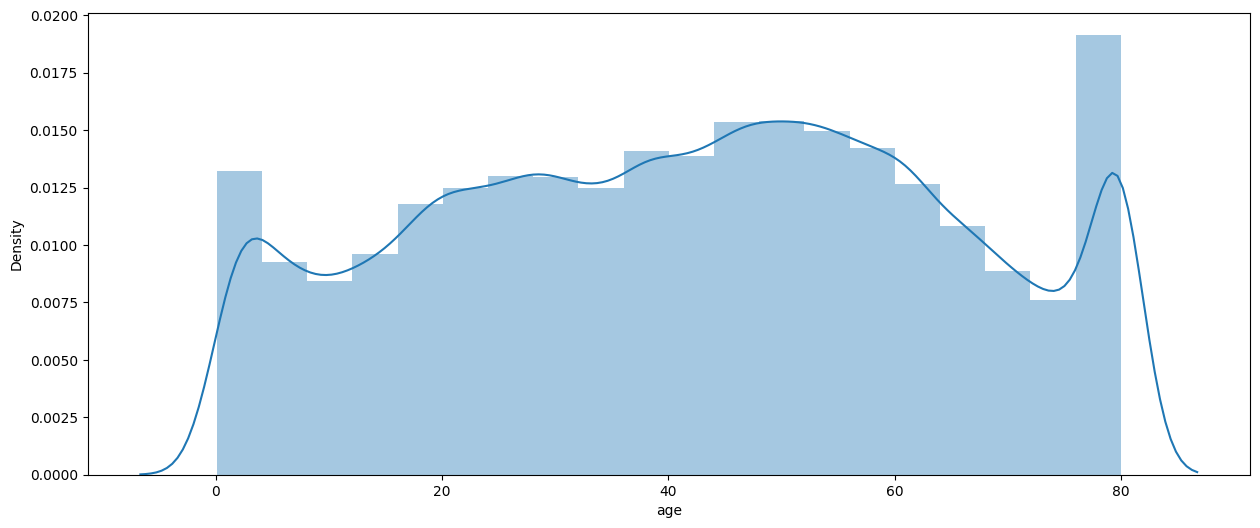

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


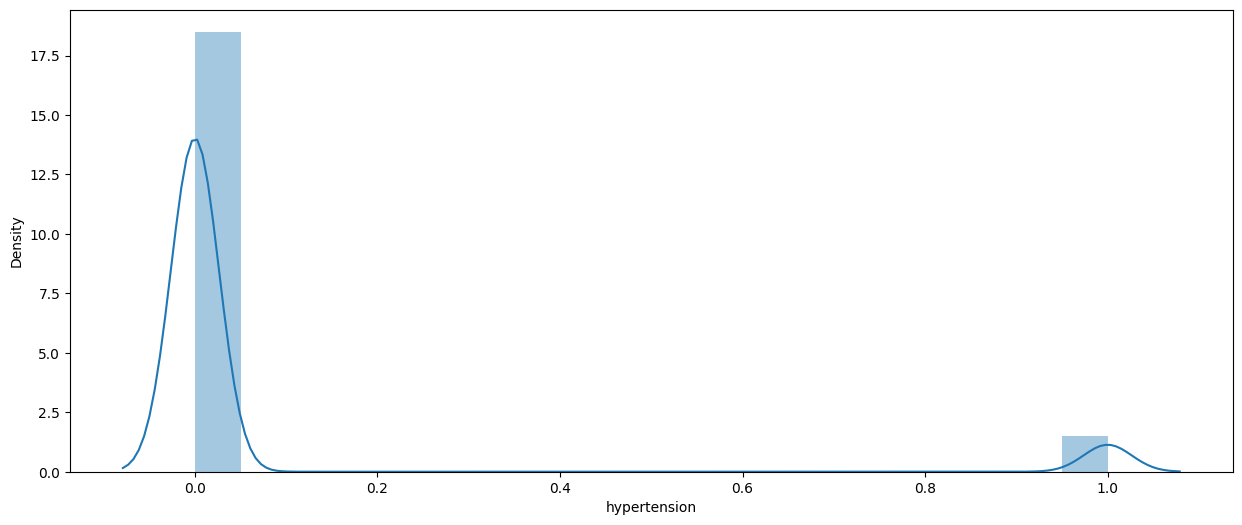

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


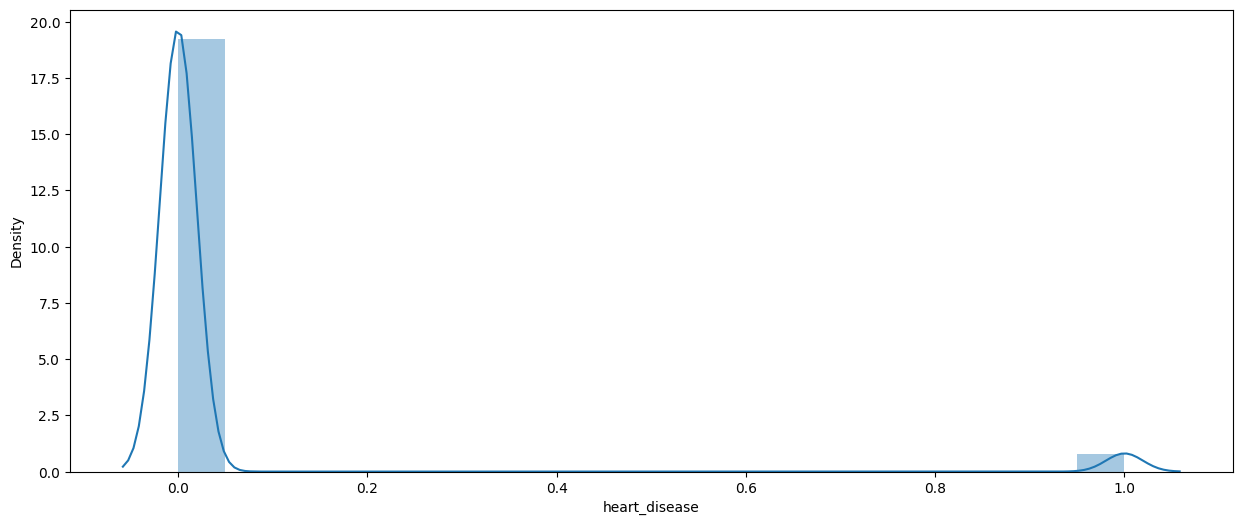

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


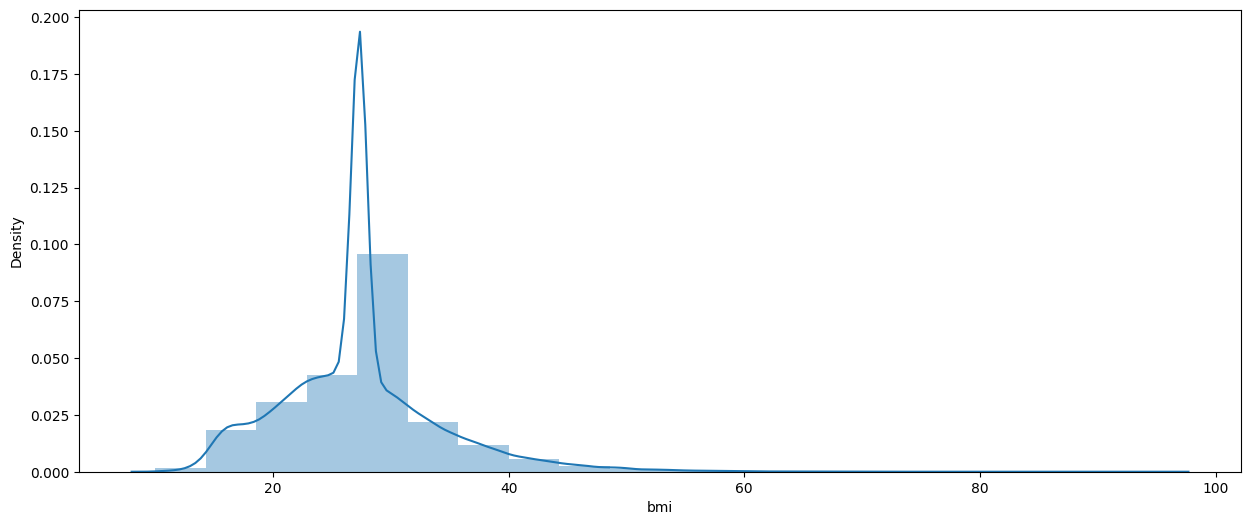

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


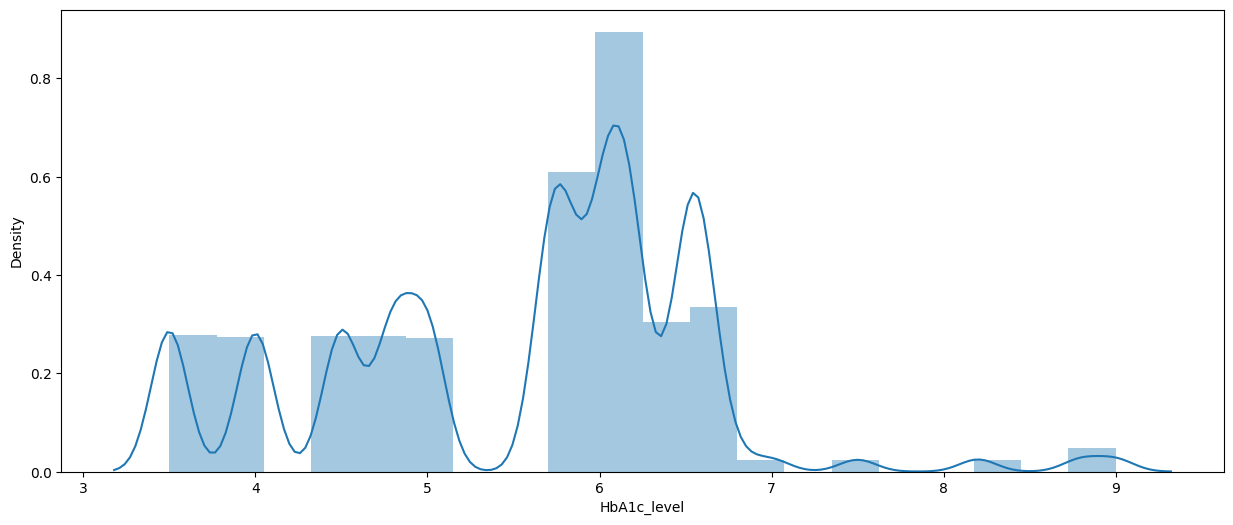

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


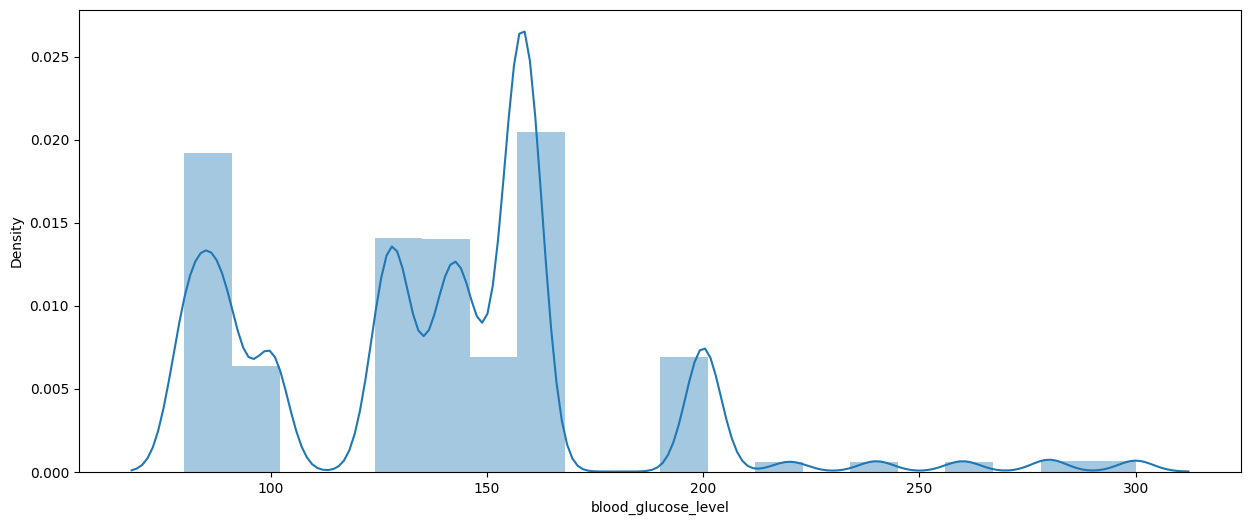

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


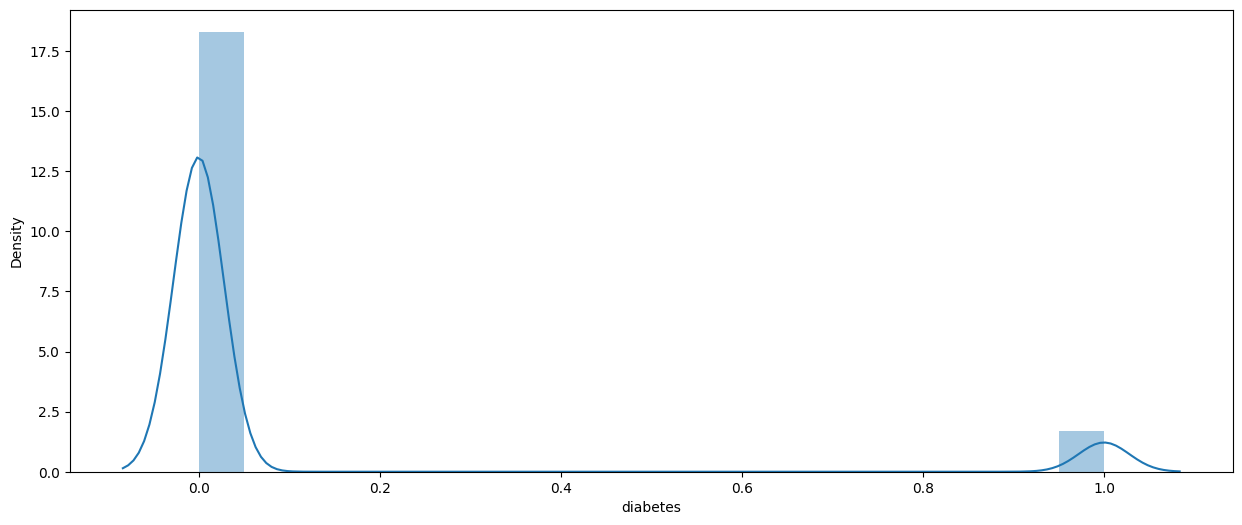

<ipython-input-31-ae3d2dd3fd01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numcol[i], bins = 20, kde = True)


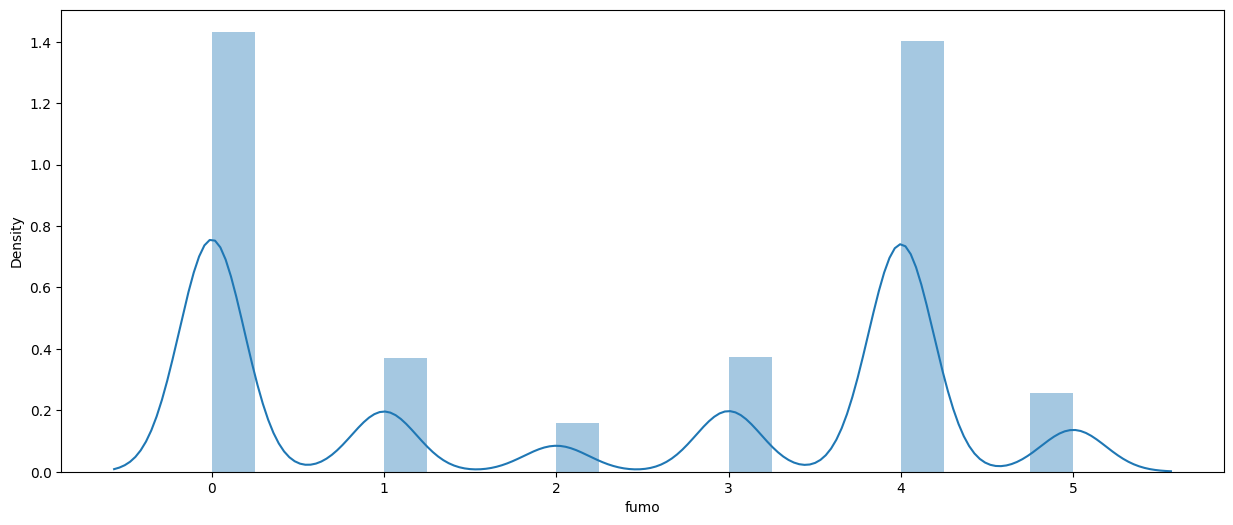

In [ ]:
#vediamo la vera distribuzione
for i in numcol:
    plt.figure(figsize=(15,6))
    sns.distplot(numcol[i], bins = 20, kde = True)
    plt.show()

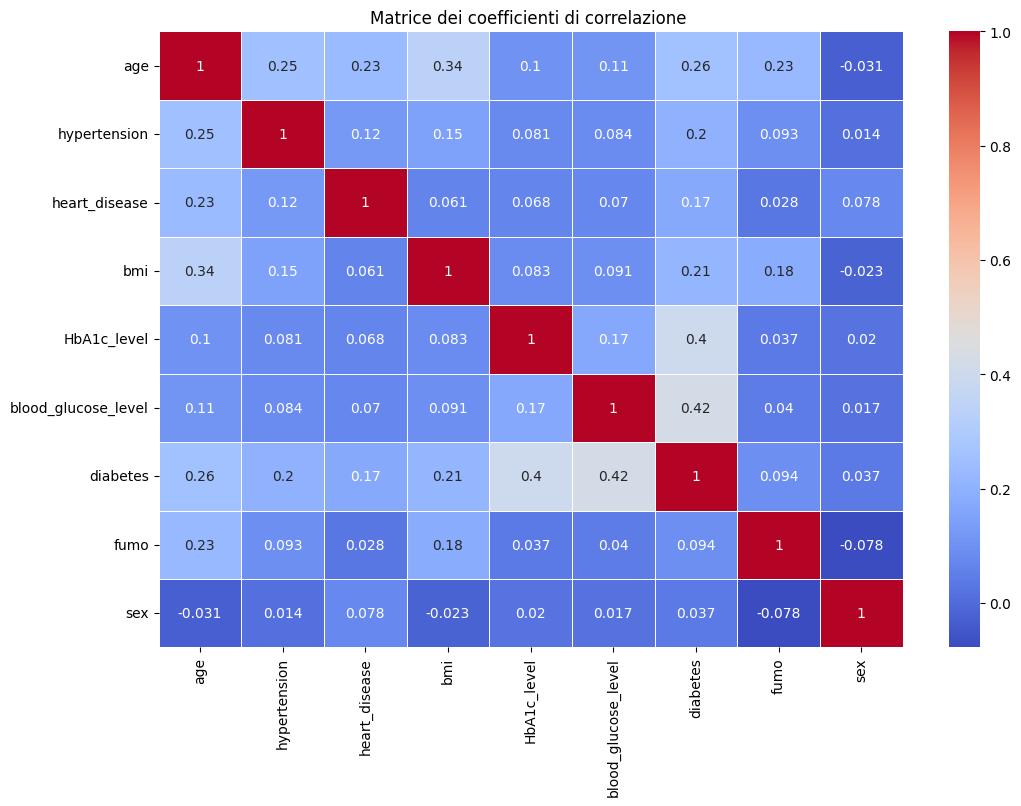

In [ ]:
#definisco e plotto la matrice di correlazione
correlation_matrix = numcol.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice dei coefficienti di correlazione ')
plt.show()

PRE PROCESSING

label encoding già effettuato per ulteriori grafici nella fase EDA. In questa fase si fa lo split dei dati in training e test set

In [ ]:
numcol.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,fumo,sex
0,80.0,0,1,25.19,6.6,140,0,4,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,4,1
3,36.0,0,0,23.45,5.0,155,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,1


In [ ]:
#separo il target dal resto

X = numcol.drop(['diabetes'], axis=1)
y = numcol['diabetes']

Per avere maggiore precisione con gli algoritmi, i dati vengono scalati

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
#ora vanno creati training e test set tramite apposito modulo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10,stratify=y)

CLASSIFICATION

1) Linear SVC
Un algoritmo support vector machine

In [ ]:
from sklearn.svm import LinearSVC #per il modello
from sklearn.metrics import classification_report,r2_score, mean_squared_error, mean_absolute_percentage_error #per valutare il modello

clf = LinearSVC() #dichiaro il modello
clf.fit(X_train,y_train) #addestramento del modello

#per la valutazione dei risultati
y_pred = clf.predict(X_test) #salvo su una variabile i risultati della predizione sul test set

print(classification_report(y_test, y_pred)) #serve per fare il confronto tra i valori reali (del test set) con quelli della predizione
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred)) #misura il legame tra la variabilità dei dati e la correttezza del modello statistico utilizzato
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False)) # se <1 buono ;indica la discrepanza quadratica media fra i valori dei dati osservati ed i valori dei dati stimati.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.91      0.61      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.94      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000

------------
Accuratezza  sul training set: 0.96
Accuratezza sul  test set: 0.96
r2: 0.513
MSE: 0.195


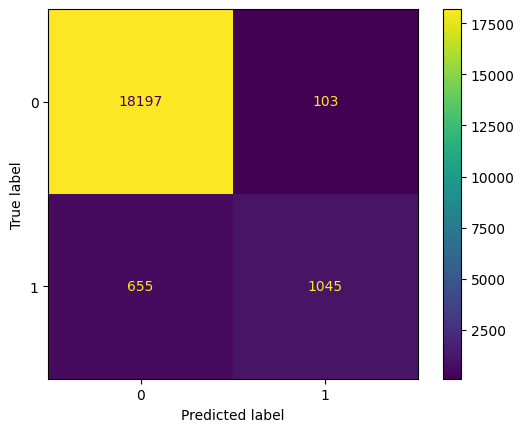

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#genera la matrice di confusione per vedere dove il modello sbaglia
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

#crea un grafico a partire dalla matrice
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Vediamo anche la featue importance, cioè le features piu importanti per il modello. Non essendo un modello basato sugli alberi , i valori delle features importance li devo ricavare con i test di permutazione

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(clf, X_train, y_train, scoring='r2', n_jobs=-1) #valuto la feature importance in base a  r2
importance = results.importances_mean  #prende l'importanza

#per capire la corrispsondenza tra numeri e feeture nell'ultimo ciclo for
cont=0
for i in X.columns:
    cont=str(cont)
    print(cont + ' '+i)
    cont=int(cont)
    cont=cont+1

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

0 age
1 hypertension
2 heart_disease
3 bmi
4 HbA1c_level
5 blood_glucose_level
6 fumo
7 sex
Feature: 0, Score: 0.06879
Feature: 1, Score: 0.00508
Feature: 2, Score: 0.00251
Feature: 3, Score: 0.04339
Feature: 4, Score: 0.57142
Feature: 5, Score: 0.37580
Feature: 6, Score: 0.00235
Feature: 7, Score: 0.00145


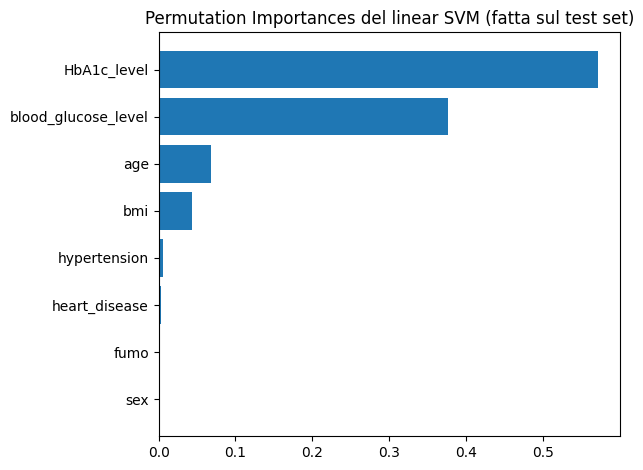

In [ ]:
#uguale a sopra ma ne faccio una rappresentazione grafica

sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del linear SVM (fatta sul test set)")
fig.tight_layout()
plt.show()

In [ ]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,fumo,sex
0,80.0,0,1,25.19,6.6,140,4,0
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,4,1
3,36.0,0,0,23.45,5.0,155,1,0
4,76.0,1,1,20.14,4.8,155,1,1


sulla base delle due più rilevati faccio il decision boundary: per visualizzarle graficamente in 2D devo prendere solo 2 feautures e prendo quelle più rilevanti per il modello

In [ ]:
#riprendo il data frame e gli lascio due colonne, cioe due features e ci addestro un nuovo clf dopo aver fatto scaling e dvisione dei dati
#questo poi lo posso usare anche con altri modelli


#essendo in 2D il modello deve essre addestrato su due sole features
X_2 = numcol.drop(['diabetes','age','hypertension','heart_disease','bmi','fumo','sex'], axis=1) #lascio soo quelle rilevanti
y_2 = numcol['diabetes']

#scaling dati
scaler_2 = StandardScaler()
X_2_scaled = scaler_2.fit_transform(X_2) #fittrandorm in unica riga

#divisione dati
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_scaled, y_2, test_size=0.2, random_state=42,stratify=y_2)

#dichiarazione e addestramento del modello
clf_2 = LinearSVC()
clf_2.fit(X_train_2, y_train_2)

#per la valutazione dei risultati
y_pred_2 = clf_2.predict(X_test_2)

print(classification_report(y_test_2, y_pred_2))
print('------------')



              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       1.00      0.53      0.69      1700

    accuracy                           0.96     20000
   macro avg       0.98      0.76      0.84     20000
weighted avg       0.96      0.96      0.95     20000

------------


In [ ]:
X_2.head()

,HbA1c_level,blood_glucose_level
0,6.6,140
1,6.6,80
2,5.7,158
3,5.0,155
4,4.8,155


Text(0.5, 1.0, 'Bordo di separazione')

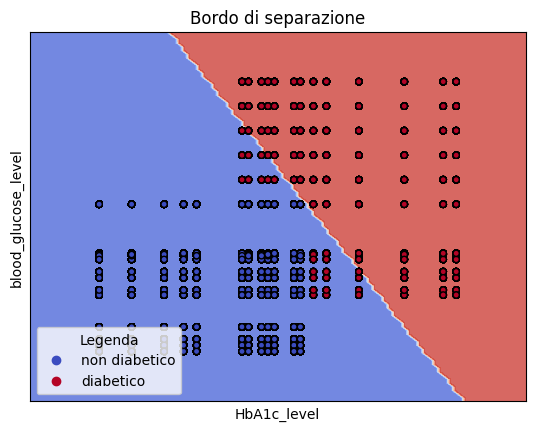

In [ ]:
#ora passo effettivamente alla visualizzazione

from sklearn.inspection import DecisionBoundaryDisplay

#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)  #per aggiustare la figura

#mi serve per gli assi del grafico, dove prendo le due variabili e poi le passo come riferimento per gli assi
X0, X1 = X_2_scaled[:, 0], X_2_scaled[:, 1]
labels= {0: 'non diabetico', 1: 'diabetico'} #servono per la leneda del grafico

#estimator è il modello utilizzato
disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,  #il modello fittato
        X_2_scaled[:,:2],  #le colonne da graficare
        response_method="predict", #dev fare la predizione
        cmap=plt.cm.coolwarm,  #colore della mappa predefinito, ne esistono molte altre
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )  #scatter per i punti
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k") #c è il target
disp.ax_.legend(  #definisco la legenda
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left", #dove voglio la legenda
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

ora vengono ripercorsi gli i passaggi illustrati con altri modelli di classificazione

2) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() #dichiaro il modello
clf.fit(X_train,y_train) #addestramento del modello

#per la valutazione dei risultati
y_pred = clf.predict(X_test) #salvo su una variabile i risultati della predizione sul test set

print(classification_report(y_test, y_pred))
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False))



              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18300
           1       0.46      0.67      0.54      1700

    accuracy                           0.90     20000
   macro avg       0.71      0.80      0.75     20000
weighted avg       0.92      0.90      0.91     20000

------------
Accuratezza  sul training set: 0.90
Accuratezza sul  test set: 0.90
r2: -0.231
MSE: 0.309


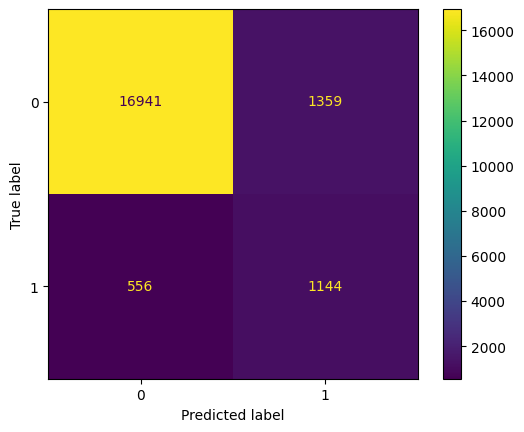

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#feature importance
results = permutation_importance(clf, X_train, y_train, scoring='r2', n_jobs=-1) #valuto la feature importance in base a  r2
importance = results.importances_mean
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del GaussianNB (fatta sul test set)")
fig.tight_layout()
plt.show()

KeyboardInterrupt: 

Text(0.5, 1.0, 'Bordo di separazione')

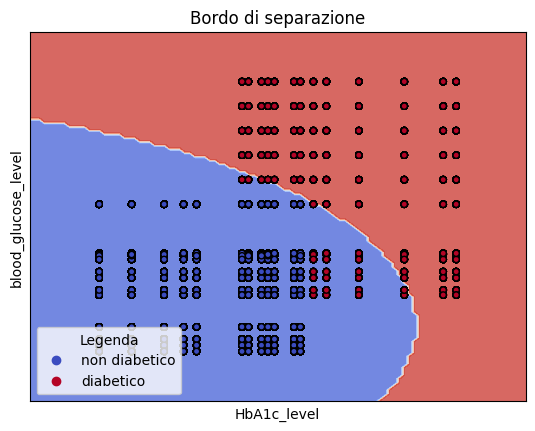

In [ ]:
#dichiarazione e addestramento del modello per il decision boundary che utilizza due features
#come il linear SVC le due più importanti coincidono, pertanto posso utilizzare gli stessi dati scalati sul modello che si addestra con due colonne

clf_2 = GaussianNB()
clf_2.fit(X_train_2, y_train_2)
y_pred_2 = clf_2.predict(X_test_2)


#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)



disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,
        X_2_scaled[:,:2],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left",
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

3) KNN

In particolare vediamo la sua accuratezza in base al parametro k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#mi serve per salvarmi i risultati in base al parametro k
score_list = []
n_neighbors_list = []

# uso il ciclo for per vedere il miglior valore del parametro per il modello
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Miglior risultato del knn è con parametro  {best_n_neighbor} e vale  {max(score_list)*100:.4f} %")

Miglior risultato del knn è con parametro  13 e vale  96.3650 %


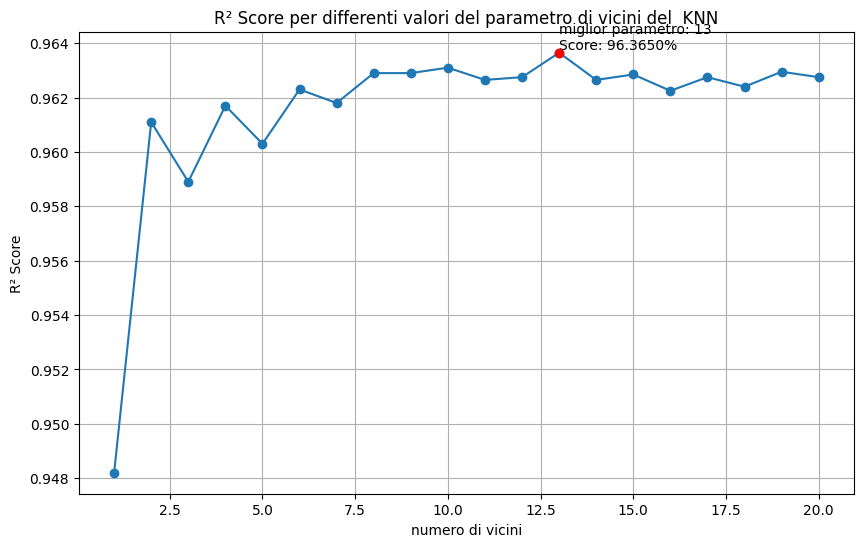

miglior risultato è 96.3650 in corrispondenza di  13 come parametro %


In [ ]:
#vado a graficare i risultati ottenti

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o')
plt.xlabel('numero di vicini')
plt.ylabel('R² Score')
plt.title('R² Score per differenti valori del parametro di vicini del  KNN')
plt.grid(True)

# Highlight the best n_neighbors
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
best_score = max(score_list)
plt.scatter([best_n_neighbor], [best_score], color='red', zorder=5)
plt.text(best_n_neighbor, best_score, f'miglior parametro: {best_n_neighbor}\nScore: {best_score*100:.4f}%',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

print(f"miglior risultato è {best_score*100:.4f} in corrispondenza di  {best_n_neighbor} come parametro %")

ora lavoro con il modello settando il parametro k=13 visto che è il migliore

In [ ]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.95      0.60      0.74      1700

    accuracy                           0.96     20000
   macro avg       0.96      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000

------------
Accuratezza  sul training set: 0.97
Accuratezza sul  test set: 0.96
r2: 0.533
MSE: 0.191


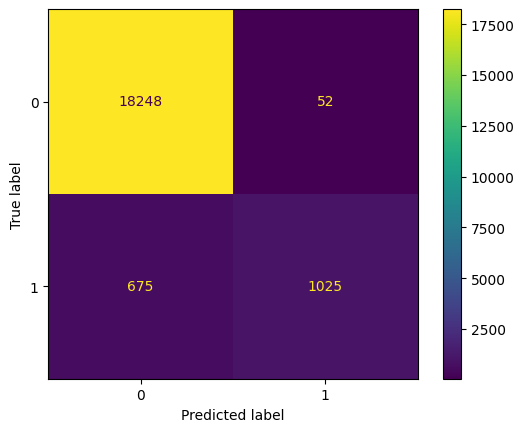

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

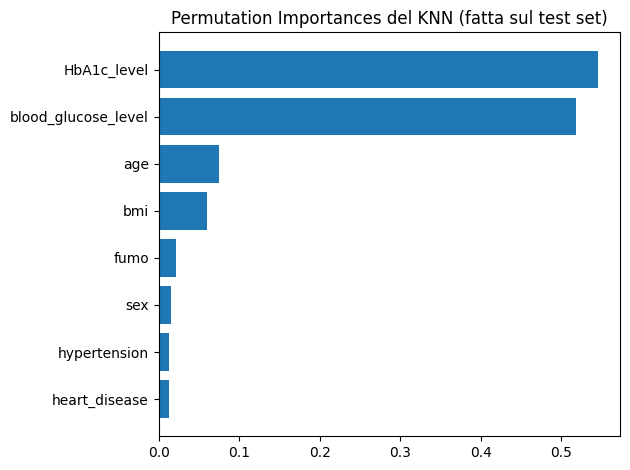

In [ ]:
#feature importance
results = permutation_importance(clf, X_train, y_train, scoring='r2', n_jobs=-1) #valuto la feature importance in base a  r2
importance = results.importances_mean
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del KNN (fatta sul test set)")
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Bordo di separazione')

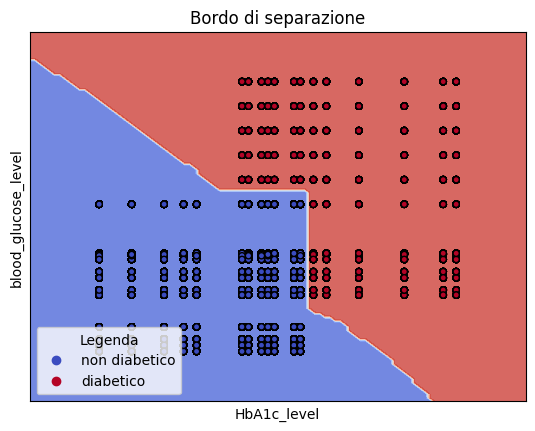

In [ ]:
clf_2 = KNeighborsClassifier(n_neighbors=13)
clf_2.fit(X_train_2, y_train_2)
y_pred_2 = clf_2.predict(X_test_2)


#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)



disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,
        X_2_scaled[:,:2],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left",
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

4) Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.71      0.76      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

------------
Accuratezza  sul training set: 1.00
Accuratezza sul  test set: 0.95
r2: 0.398
MSE: 0.216


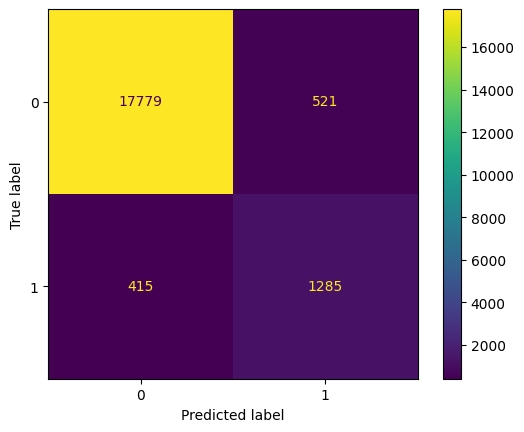

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Text(0.5, 1.0, ' feautures importance albero decisionale   ')

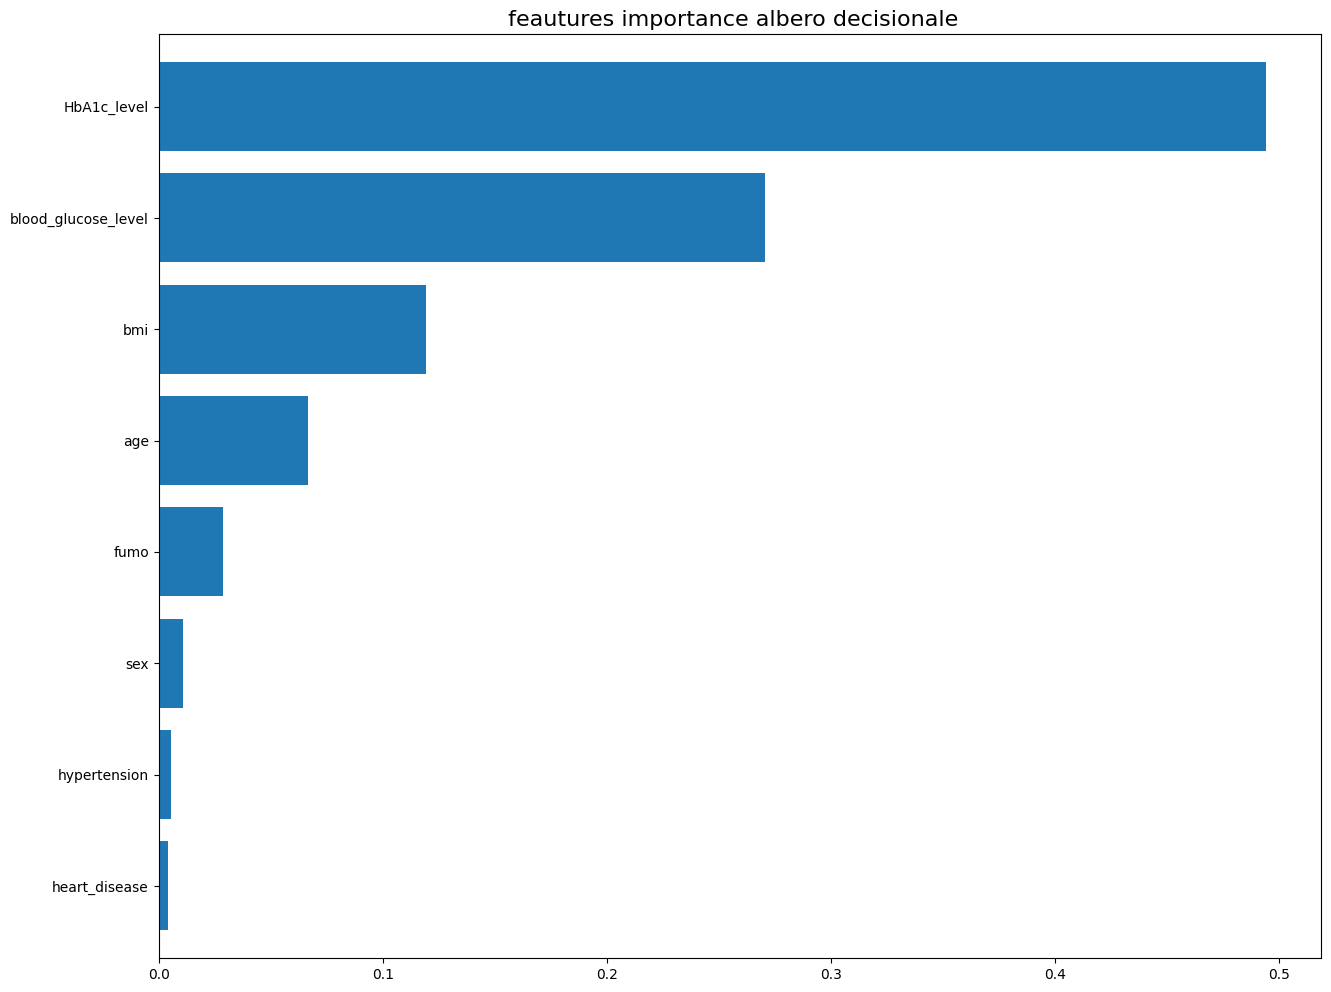

In [ ]:
#la feature importance è immediata per i modelli ad albero, per cui non servono i test di permutazione
plt.figure(figsize=(15,12))
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance albero decisionale   ', size=16)

Text(0.5, 1.0, 'Bordo di separazione')

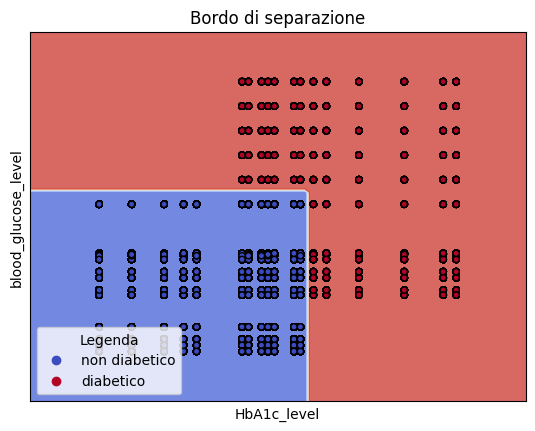

In [ ]:
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train_2, y_train_2)
y_pred_2 = clf_2.predict(X_test_2)


#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)



disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,
        X_2_scaled[:,:2],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left",
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

5) Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

------------
Accuratezza  sul training set: 1.00
Accuratezza sul  test set: 0.97
r2: 0.625
MSE: 0.171


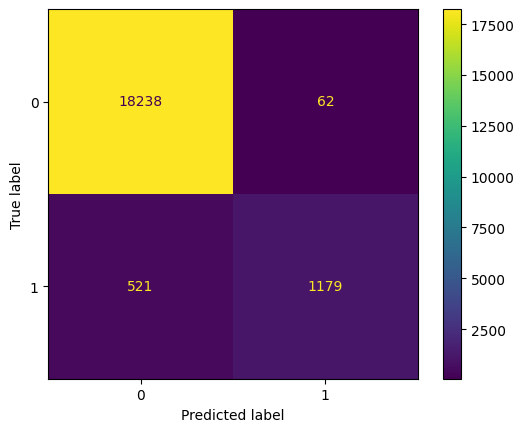

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Text(0.5, 1.0, ' feautures importance random forest   ')

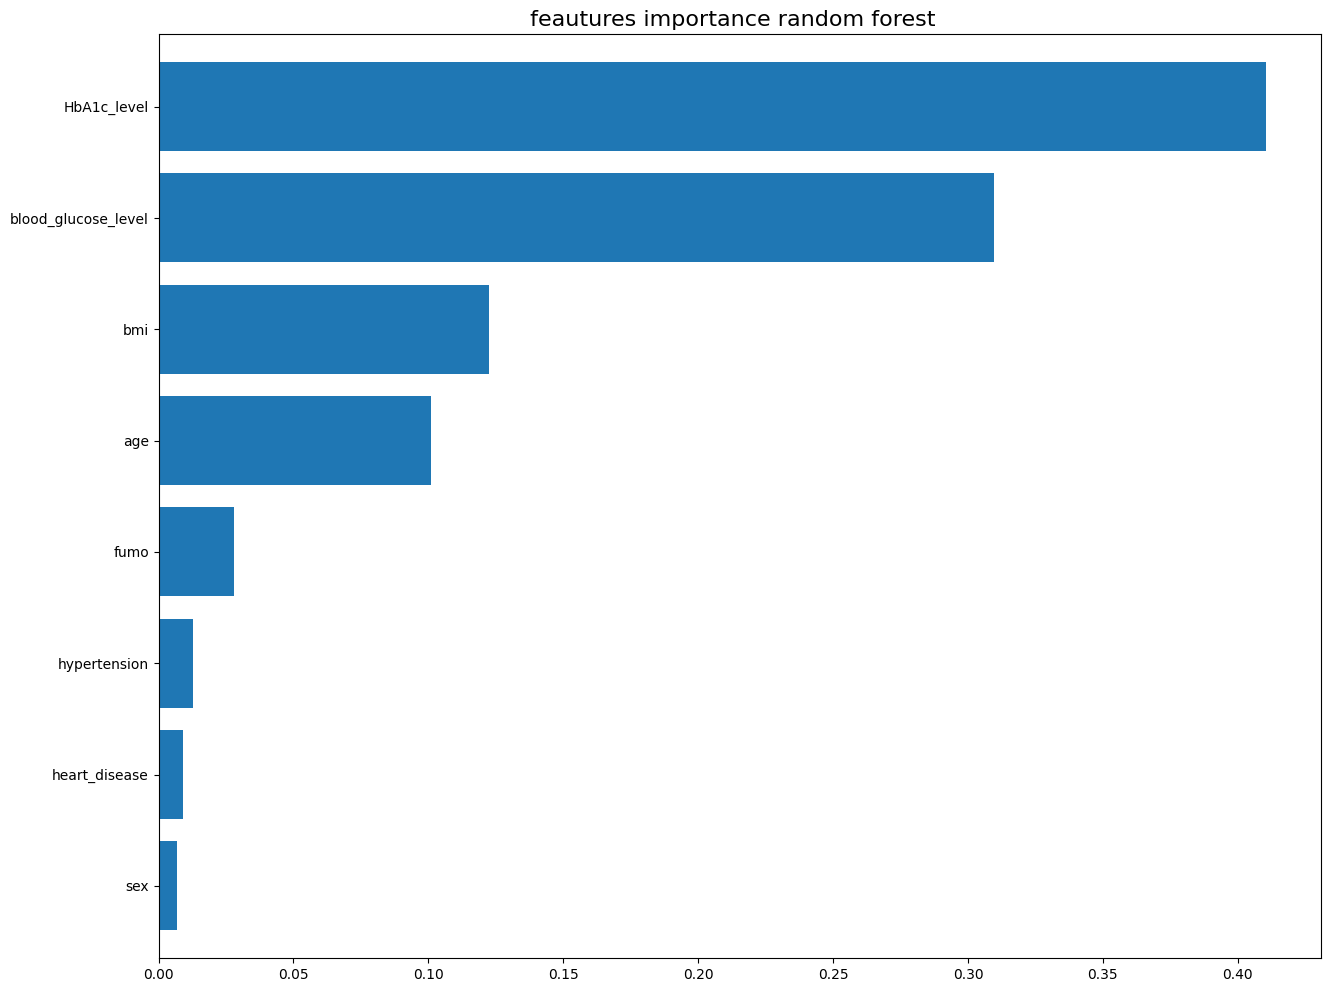

In [ ]:
plt.figure(figsize=(15,12))
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance random forest   ', size=16)

Text(0.5, 1.0, 'Bordo di separazione')

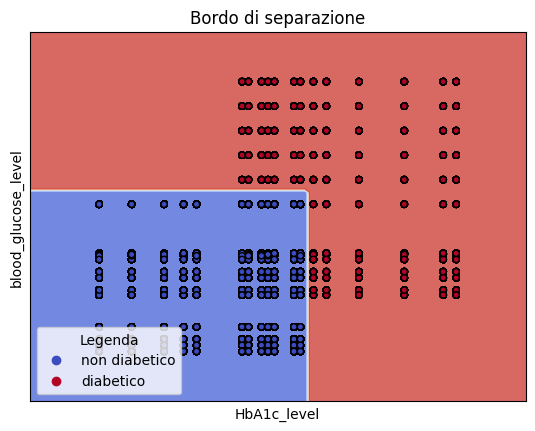

In [ ]:
clf_2 = RandomForestClassifier()
clf_2.fit(X_train_2, y_train_2)
y_pred_2 = clf_2.predict(X_test_2)


#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)



disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,
        X_2_scaled[:,:2],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left",
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

6) MLPClassifier

Si tratta di una rete di perceptron a multi livello

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('------------')
print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('r2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred, squared=False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

------------
Accuratezza  sul training set: 0.97
Accuratezza sul  test set: 0.97
r2: 0.644
MSE: 0.166


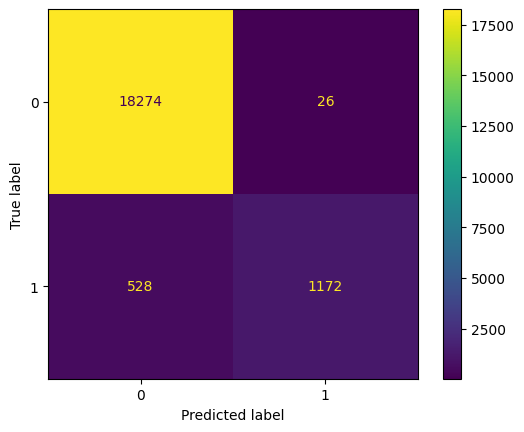

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

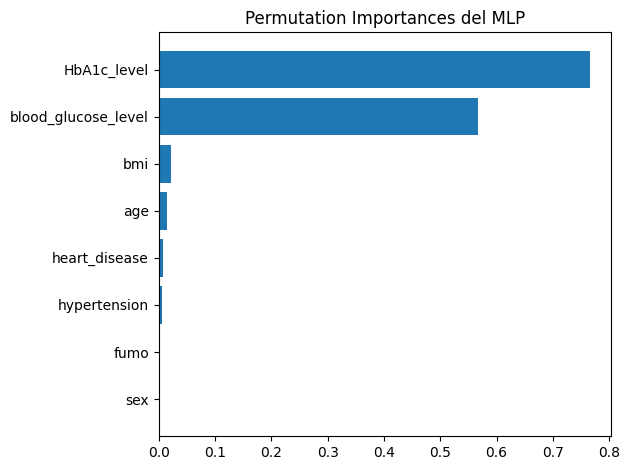

In [ ]:
#feature importance
results = permutation_importance(clf, X_train, y_train, scoring='r2', n_jobs=-1) #valuto la feature importance in base a  r2
importance = results.importances_mean
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del MLP")
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Bordo di separazione')

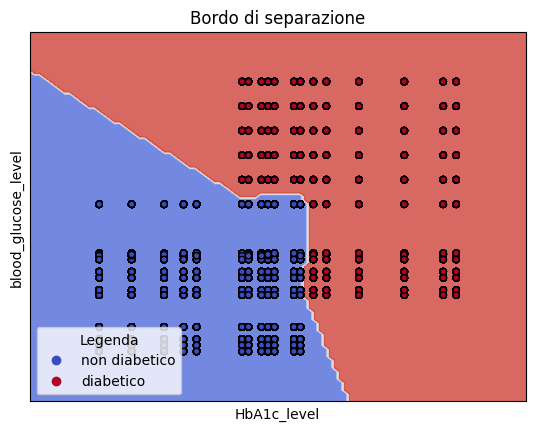

In [ ]:
clf_2 = MLPClassifier()
clf_2.fit(X_train_2, y_train_2)
y_pred_2 = clf_2.predict(X_test_2)


#per la figura
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)



disp = DecisionBoundaryDisplay.from_estimator(
        clf_2,
        X_2_scaled[:,:2],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=X_2.columns[0],
        ylabel=X_2.columns[1],
    )
scatter = ax.scatter(X0, X1, c=y_2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    labels.values(),
    loc="lower left",
    title="Legenda",
)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Bordo di separazione')

VALUTAZIONE RISULTATI

Tutti i modelli utilizzati, pur avendo caratteristiche differenti, si sono dimostrati molto accurati.

Interessante notare:
-  la classe 1 , cioè i diabetici, è quella con maggior errore in quanto il dataset è sbilanciato verso la classe 0 (visto anche graficamente nell'analisi esplorativa)
- tutti i modelli hanno come classi più rilevanti le features di emoglobina glicata e livello di glucosio
- i bordi di separazione possono cambiare nettamente anche se i modelli hanno risultati simili

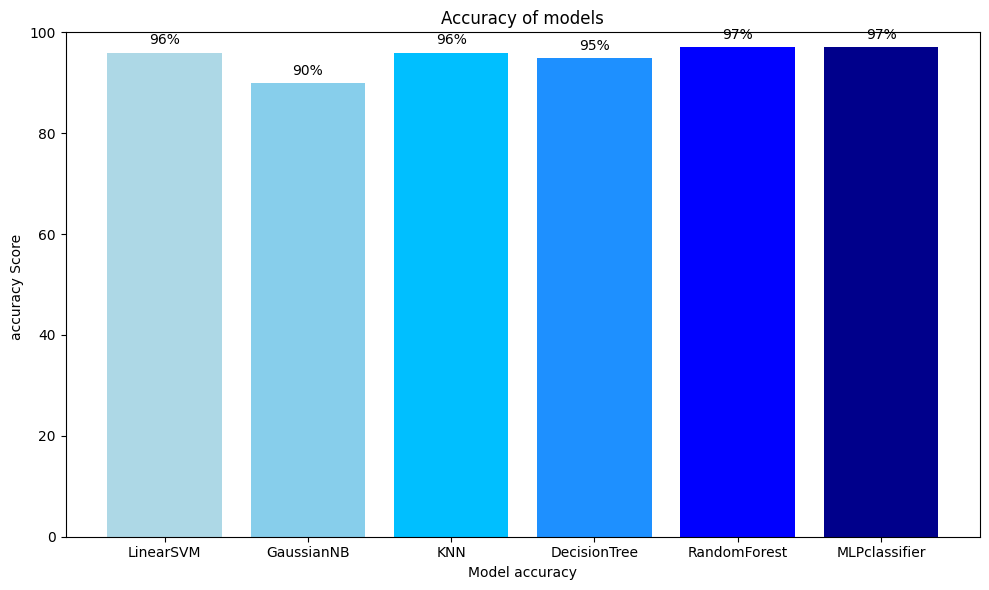

In [ ]:
models = ['LinearSVM', 'GaussianNB','KNN','DecisionTree', 'RandomForest','MLPclassifier']

# scores corrispettivi dei modelli precedentemente utilizzati ed elencati
scores = [96, 90,96, 95,97,97]

# Creazione di un bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue','blue','darkblue'])
plt.ylim(0, 100)  # metto asse y settato tra 0 e 100
plt.title('Accuracy of models')
plt.xlabel('Model accuracy')
plt.ylabel('accuracy Score ')

# metto gli socres in alto sopra le barre del grafico
for i, score in enumerate(scores):
    #plt.text(i, score + 1, f"{score:.2f}%", ha='center', va='bottom')
    plt.text(i, score + 1, f"{score}%", ha='center', va='bottom')

# mostra il grafico
plt.tight_layout()
plt.show()